In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy import interpolate

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12               # 본문 크기
mpl.rcParams['axes.labelsize'] = 14          # 축 라벨
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['mathtext.fontset'] = 'cm'      # LaTeX 수식은 Computer Modern 유지
mpl.rcParams['axes.linewidth'] = 1.0         # 논문용 선 두께

def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


![](PASTE_IMAGE/2025-10-09-19-34-03.png)

# Graph 1 $R(thr) vs R(sim)$

In [3]:
R_KC = np.load('Simul/R_Kc.npz',allow_pickle=True)
K_cs = R_KC['Kcs']
m_Kc = R_KC['ms']
K_mins = R_KC['K_mins']

In [4]:
def make_empty_array(num,Ks,ms,length):
    EMPTY = []
    for i in np.arange(num):
        EMPTY.append(np.nan*np.zeros((length,101,101)))
    return EMPTY

In [5]:
Ks = np.linspace(0,10,101)
ms = np.linspace(0,10,101)
Rs,R0s,RPs,RMs,RPLs,RMLs,Rstds,N0s,NMs,NPs = make_empty_array(10,Ks,ms,10)
KK,MM = np.meshgrid(Ks,ms)

for i in range(10):
    A = np.load(f'RS_{i+1}.npz')
    Rs[i] = A['N_Rs'].T
    R0s[i] = A['N_R0s'].T
    RPs[i] = A['N_RPs'].T
    RMs[i] = A['N_RMs'].T
    RPLs[i] = A['N_RPLs'].T
    RMLs[i] = A['N_RMLs'].T
    Rstds[i] = A['N_rstd'].T
    N0s[i] = A['N_0s'].T
    NMs[i] = A['N_Ms'].T
    NPs[i] = A['N_Ps'].T

In [6]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)

ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

In [7]:
M_Rs = np.mean(Rs,axis=0)
M_RPLs = np.mean(RPLs,axis=0)

RPLs_new = np.where((NPs>50)&(N0s>1000),RPLs,np.nan)
RMLs_new = np.where((NMs>50)&(N0s>1000),RMLs,np.nan)
R0s_new = np.where((N0s>1000),R0s,np.nan)

RPs_new = np.where((NPs>50)&(N0s>1000),RPs,np.nan)
RMs_new = np.where((NMs>50)&(N0s>1000),RMs,np.nan)
Rstd_new = np.where((NMs>50)&(N0s>1000),Rstds,np.nan)
M_RPLs = np.nanmean(RPLs_new,axis=0)
M_RMLs = np.nanmean(RMLs_new,axis=0)
M_RPs = np.nanmean(RPs_new,axis=0)
M_RMs = np.nanmean(RMs_new,axis=0)
M_R0s = np.nanmean(R0s_new,axis=0)

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2268066919.py:11: RuntimeWarning: Mean of empty slice
  M_RPLs = np.nanmean(RPLs_new,axis=0)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2268066919.py:12: RuntimeWarning: Mean of empty slice
  M_RMLs = np.nanmean(RMLs_new,axis=0)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2268066919.py:13: RuntimeWarning: Mean of empty slice
  M_RPs = np.nanmean(RPs_new,axis=0)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2268066919.py:14: RuntimeWarning: Mean of empty slice
  M_RMs = np.nanmean(RMs_new,axis=0)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2268066919.py:15: RuntimeWarning: Mean of empty slice
  M_R0s = np.nanmean(R0s_new,axis=0)


In [8]:
M_Rstds = np.nanmean(Rstds,axis=0)

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/3632673669.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(KK,MM,np.nanmean(Rstd_new,axis=0),vmin=0,vmax=0.2,cmap='magma')


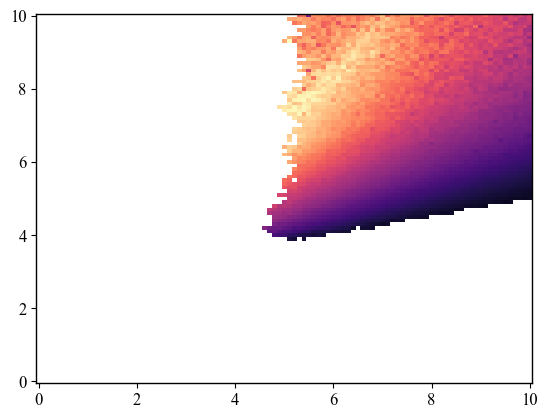

In [9]:
plt.pcolormesh(KK,MM,np.nanmean(Rstd_new,axis=0),vmin=0,vmax=0.2,cmap='magma')

In [10]:
DATA = np.load('Simul/RR_RP.npz')
Rthr = DATA['R0'] + 2*DATA['RP']#np.where(np.isnan(DATA['RP']),0,DATA['RP'])

In [11]:
RSTDS = np.array([sig_r for i in range(10)])
plt.scatter(RSTDS,Rstd_new,s=1,c=MMs,alpha=0.3,cmap='tab20b')
nan_corrcoef(RSTDS,Rstd_new)

NameError: name 'sig_r' is not defined

In [ ]:
DATA['R']

array([[       nan,        nan,        nan, ..., 0.99469548, 0.99480411,
        0.99490942],
       [       nan,        nan,        nan, ..., 0.99469548, 0.99480411,
        0.99490942],
       [       nan,        nan,        nan, ..., 0.99469548, 0.99480411,
        0.99490942],
       ...,
       [       nan,        nan,        nan, ..., 0.63358166, 0.63834841,
        0.64304966],
       [       nan,        nan,        nan, ..., 0.62896964, 0.63375002,
        0.63846565],
       [       nan,        nan,        nan, ..., 0.62439117, 0.62918428,
        0.63391327]])

In [12]:
a = 1/np.sqrt(KK*DATA['R']*MM)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

OPS = b*KK*DATA['R']
sig_r = 2*DATA['RP']*np.sqrt(1/2 - MM*KK*DATA['R0']/(4*(4*MM**2*OPS**2 + 1)) - (MM*KK*DATA['R0']/(2*(MM**2*OPS**2 + 1)))**2)
# sig_r = 2*RP*np.sqrt(1/2 - MM*KK*R0/(4*(4*MM**2*OPS**2 + 1)) - (MM*KK*R0/(2*(MM**2*OPS**2 + 1)))**2)

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/717323102.py:1: RuntimeWarning: divide by zero encountered in divide
  a = 1/np.sqrt(KK*DATA['R']*MM)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/717323102.py:2: RuntimeWarning: invalid value encountered in subtract
  b = 4/np.pi * a - 0.3056*a**3


In [13]:
RP_ = np.where(np.isnan(RPs_new),0,RPs_new)
RM_ = np.where(np.isnan(RMs_new),0,RMs_new)

Text(0, 0.5, '$R$ $(\\rm{sim})$')

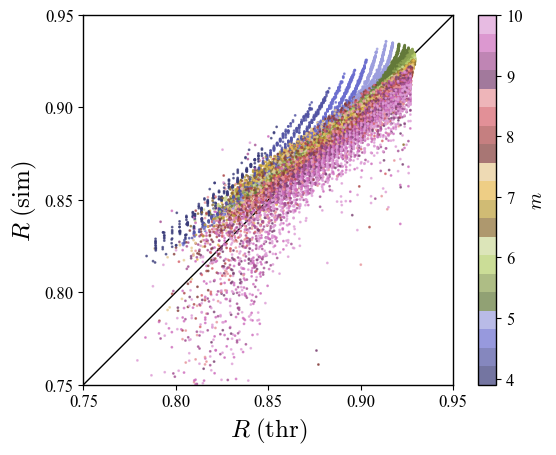

In [14]:
Rsims = []
Rthrs = []
MMs = []
KKs = []
for i in range(10):
    Rsim = R0s_new[i,:,:]+RPs_new[i,:,:]+RMs_new[i,:,:]
    Rsim = np.where(Rsim>0.1,Rsim,np.nan)
    Rsims.append(Rsim)
    Rthrs.append(Rthr)
    MMs.append(MM)
    KKs.append(KK)
Rthrs,Rsims,MMs,KKs = np.array(Rthrs),np.array(Rsims),np.array(MMs),np.array(KKs)
plt.scatter(Rthrs.flatten(),Rsims.flatten(),s=1,c=MMs.flatten(),alpha=0.7,cmap='tab20b')
plt.colorbar(label=r'$m$',)
l = (0.75,0.95)
plt.xlim(0.75,0.95)
plt.ylim(0.75,0.95)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
xticks = plt.gca().get_xticks()
plt.yticks(xticks)
Rsims = np.array(Rsims)
Rthrs = np.array(Rthrs)
MMs = np.array(MMs)
KKs = np.array(KKs)
plt.xlabel(r'$R$ $(\rm{thr})$',fontsize=18)
plt.ylabel(r'$R$ $(\rm{sim})$',fontsize=18)


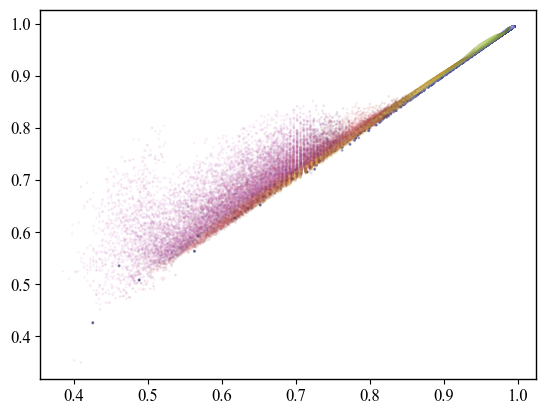

In [15]:
R0_thrs = []
R0_sims = []
for i in range(10):
    R0_thrs.append(DATA['R0'][:,:])
    R0_sims.append(R0s_new[i,:,:])
    plt.scatter(DATA['R0'][:,:],R0s_new[i,:,:],s=1,c=MM,alpha=0.1,cmap='tab20b')

R0_thrs = np.array(R0_thrs)
R0_sims = np.array(R0_sims)
# l = (0.7,1)

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/3679635748.py:6: RuntimeWarning: Mean of empty slice
  pcm = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)


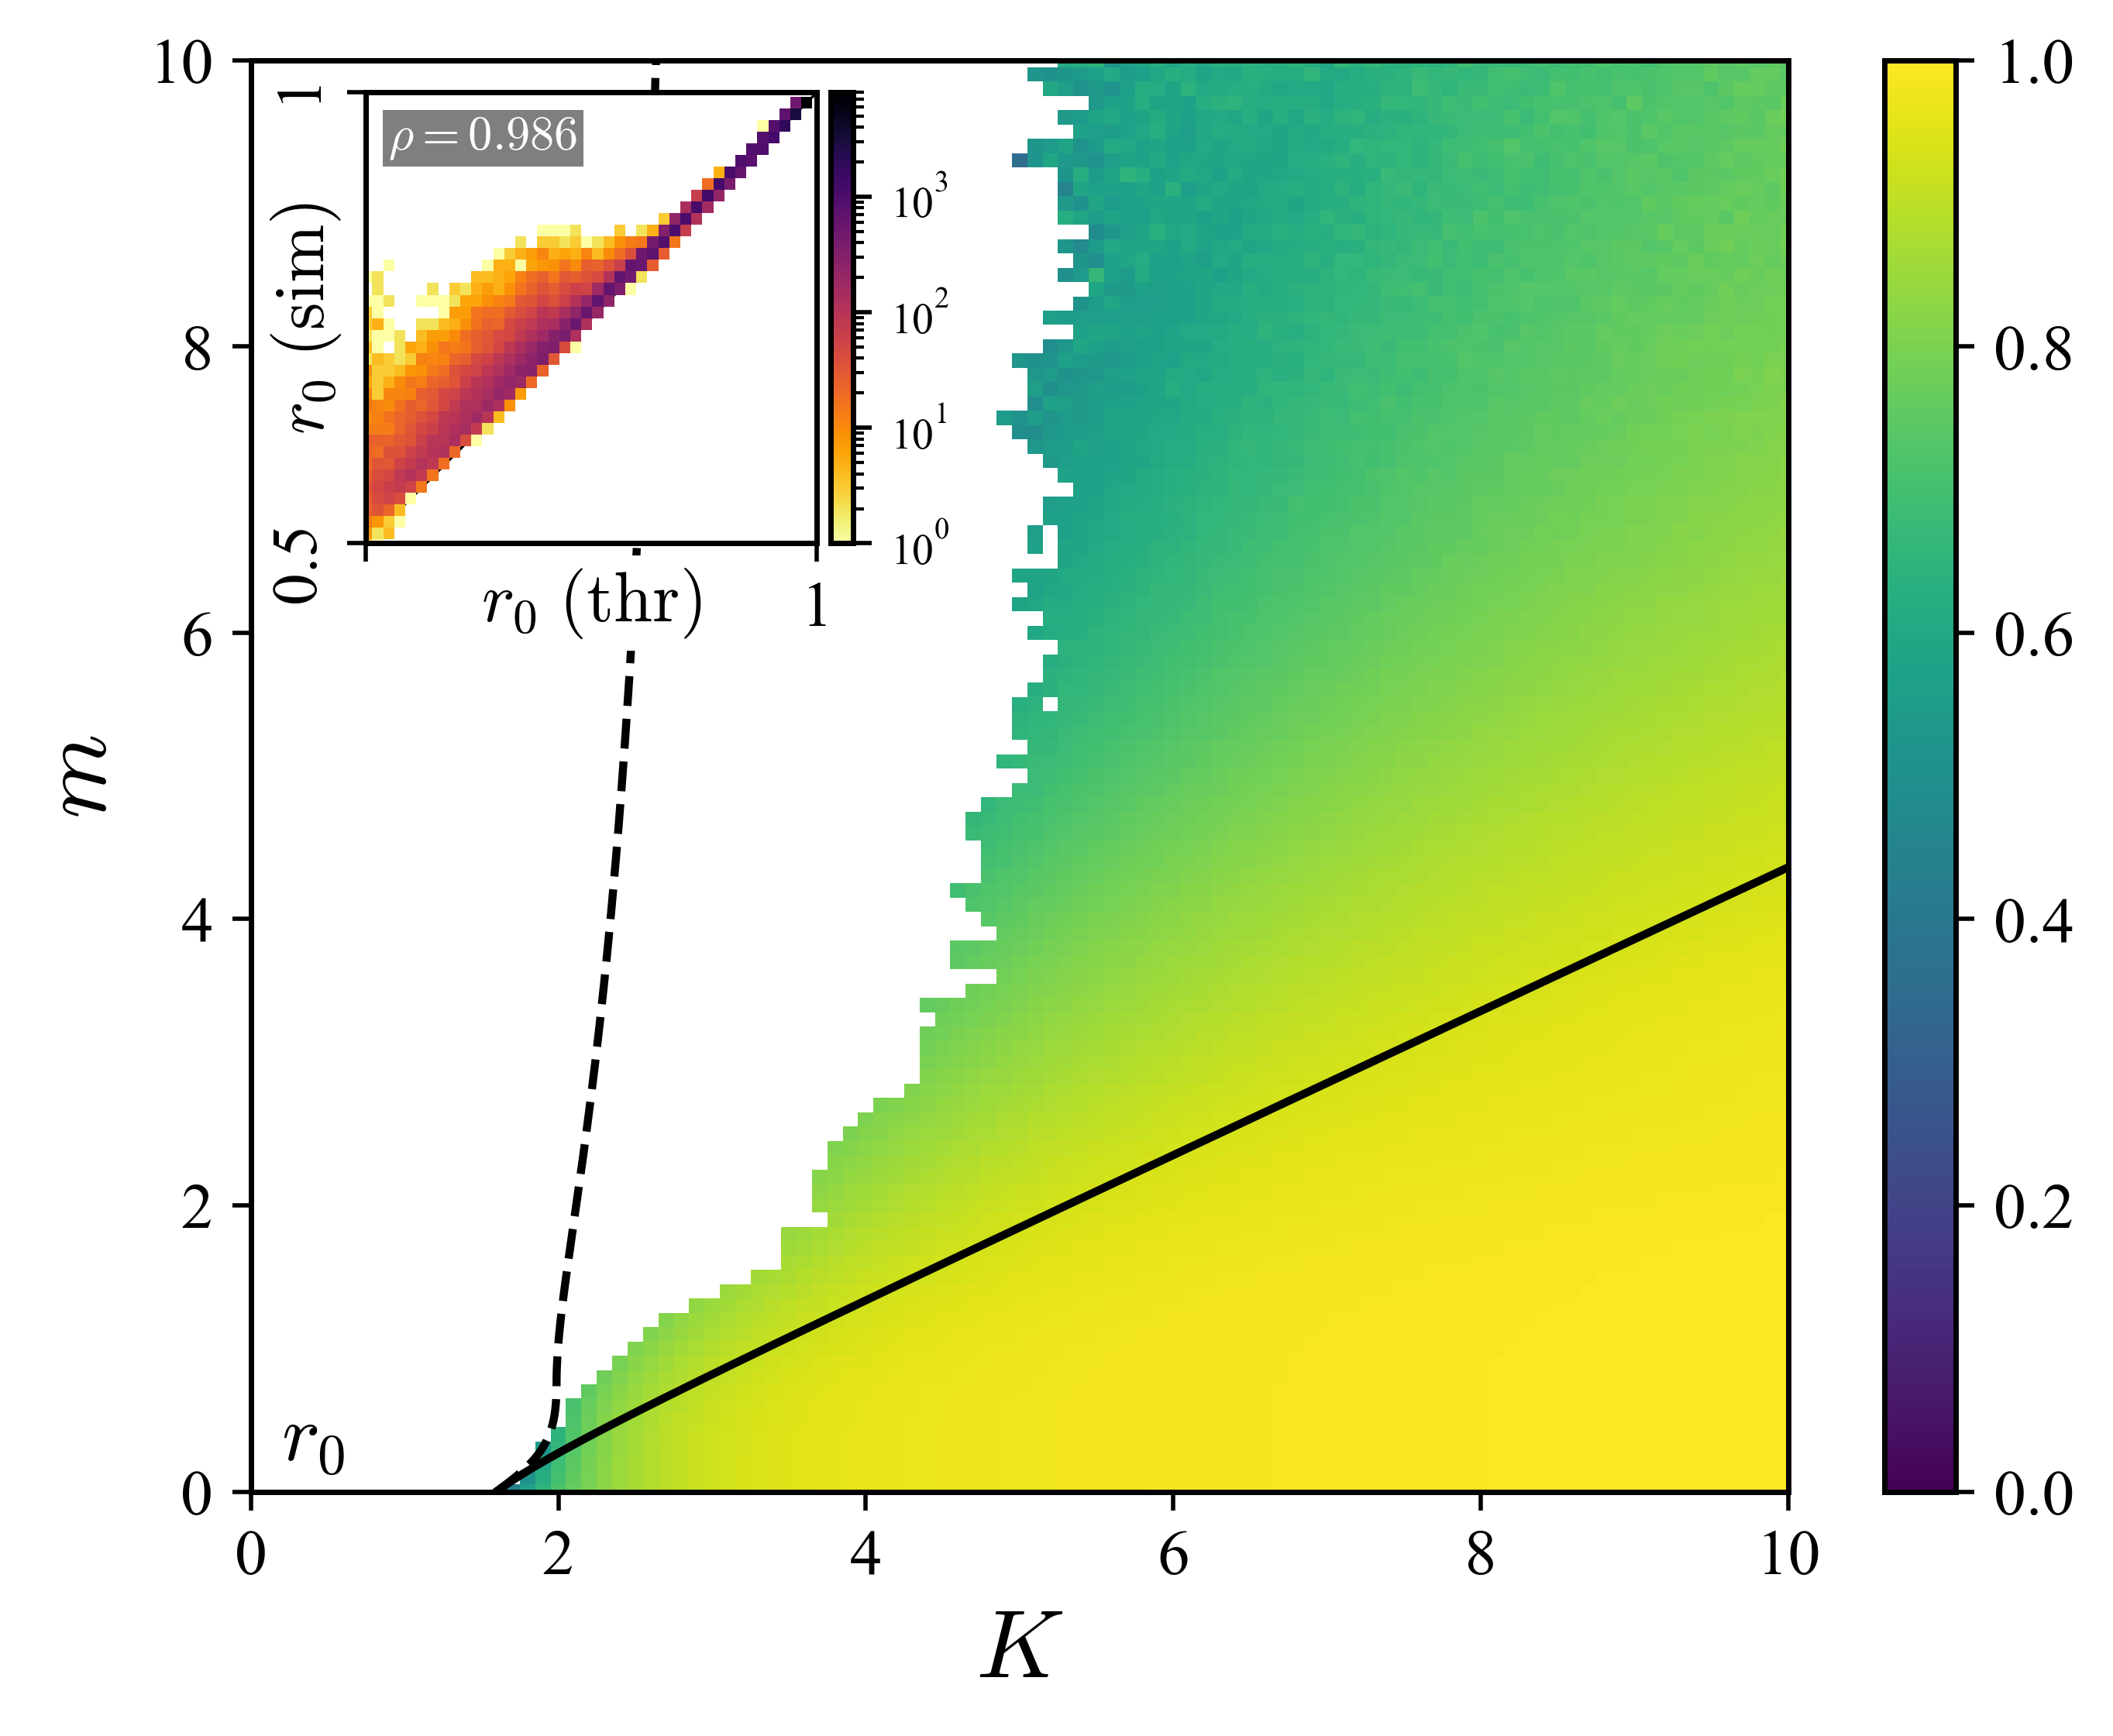

In [16]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$r_0$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="black",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(R0_thrs) & ~np.isnan(R0_sims)
F_thrs = R0_thrs[valid_indices]
F_sims = R0_sims[valid_indices]

hist = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(R0_thrs, R0_sims)
lims = (0.5, 1)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_0$ $(\mathrm{thr})$', fontsize=13)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_0$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.5, 1], [0.5, 1])
axins.set_xticks([0.5, 1], ["", 1])
axins.tick_params(axis='y', rotation=90)

plt.show()


(0.0, 0.3127322170381097)

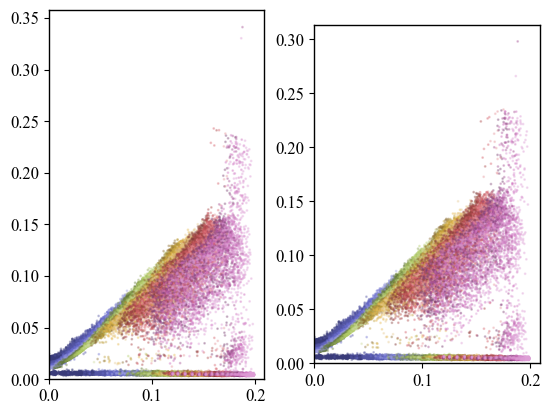

In [17]:
RP_thrs = []
RP_sims = []

RM_thrs = []
RM_sims = []
plt.subplot(121)
for i in range(10):
    RP_thrs.append(DATA['RP'][:,:])
    RP_sims.append(RPs[i,:,:])
    plt.scatter(DATA['RP'][:,:],RPs[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RP_sims = np.array(RP_sims)
RP_thrs = np.array(RP_thrs)
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(122)

for i in range(10):
    RM_thrs.append(DATA['RP'][:,:])
    RM_sims.append(RMs[i,:,:])
    plt.scatter(DATA['RP'][:,:],RMs[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RM_sims = np.array(RM_sims)
RM_thrs = np.array(RM_thrs)
plt.xlim(0,)
plt.ylim(0,)


(0.0, 0.3979592069154795)

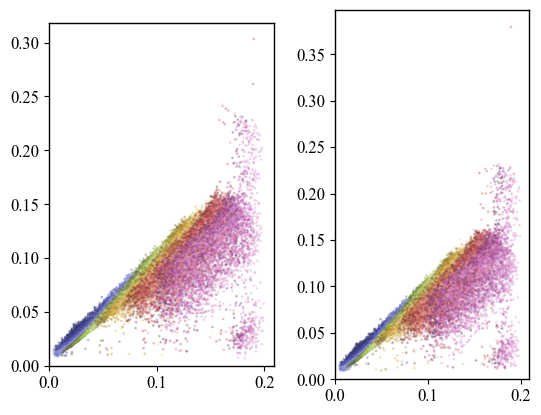

In [18]:
RPL_thrs = []
RPL_sims = []
RML_thrs = []
RML_sims = []
plt.subplot(121)
for i in range(10):
    RPL_thrs.append(DATA['RPl'][:,:])
    RPL_sims.append(RPLs_new[i,:,:])
    plt.scatter(DATA['RPl'][:,:],RPLs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RPL_sims = np.array(RPL_sims)
RPL_thrs = np.array(RPL_thrs)
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(122)

for i in range(10):
    RML_thrs.append(DATA['RPl'][:,:])
    RML_sims.append(RMLs_new[i,:,:])
    plt.scatter(DATA['RPl'][:,:],RMLs_new[i,:,:],s=1,c=MM,alpha=0.3,cmap='tab20b')
# l = (0.7,1)
# plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
RML_sims = np.array(RML_sims)
RML_thrs = np.array(RML_thrs)
plt.xlim(0,)
plt.ylim(0,)


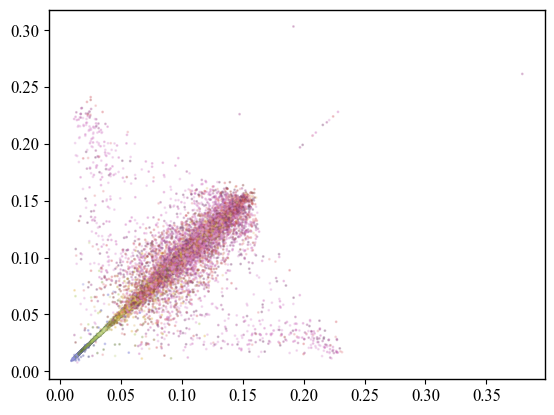

In [19]:
plt.scatter(RML_sims.flatten(),RPL_sims.flatten(),s=1,c=MMs.flatten(),alpha=0.3,cmap='tab20b')

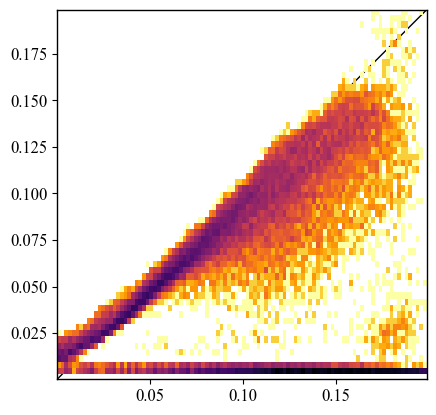

In [20]:
conds = np.isnan(RP_sims.flatten())|np.isnan(RP_thrs.flatten())
plt.hist2d(RP_thrs.flatten()[~conds],RP_sims.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
plt.gca().set_aspect('equal', adjustable='box')

plt.ylim(plt.gca().get_xlim())
plt.plot(plt.gca().get_xlim(),plt.gca().get_xlim(),c='k',lw=1,zorder=-10)



/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/3708607674.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


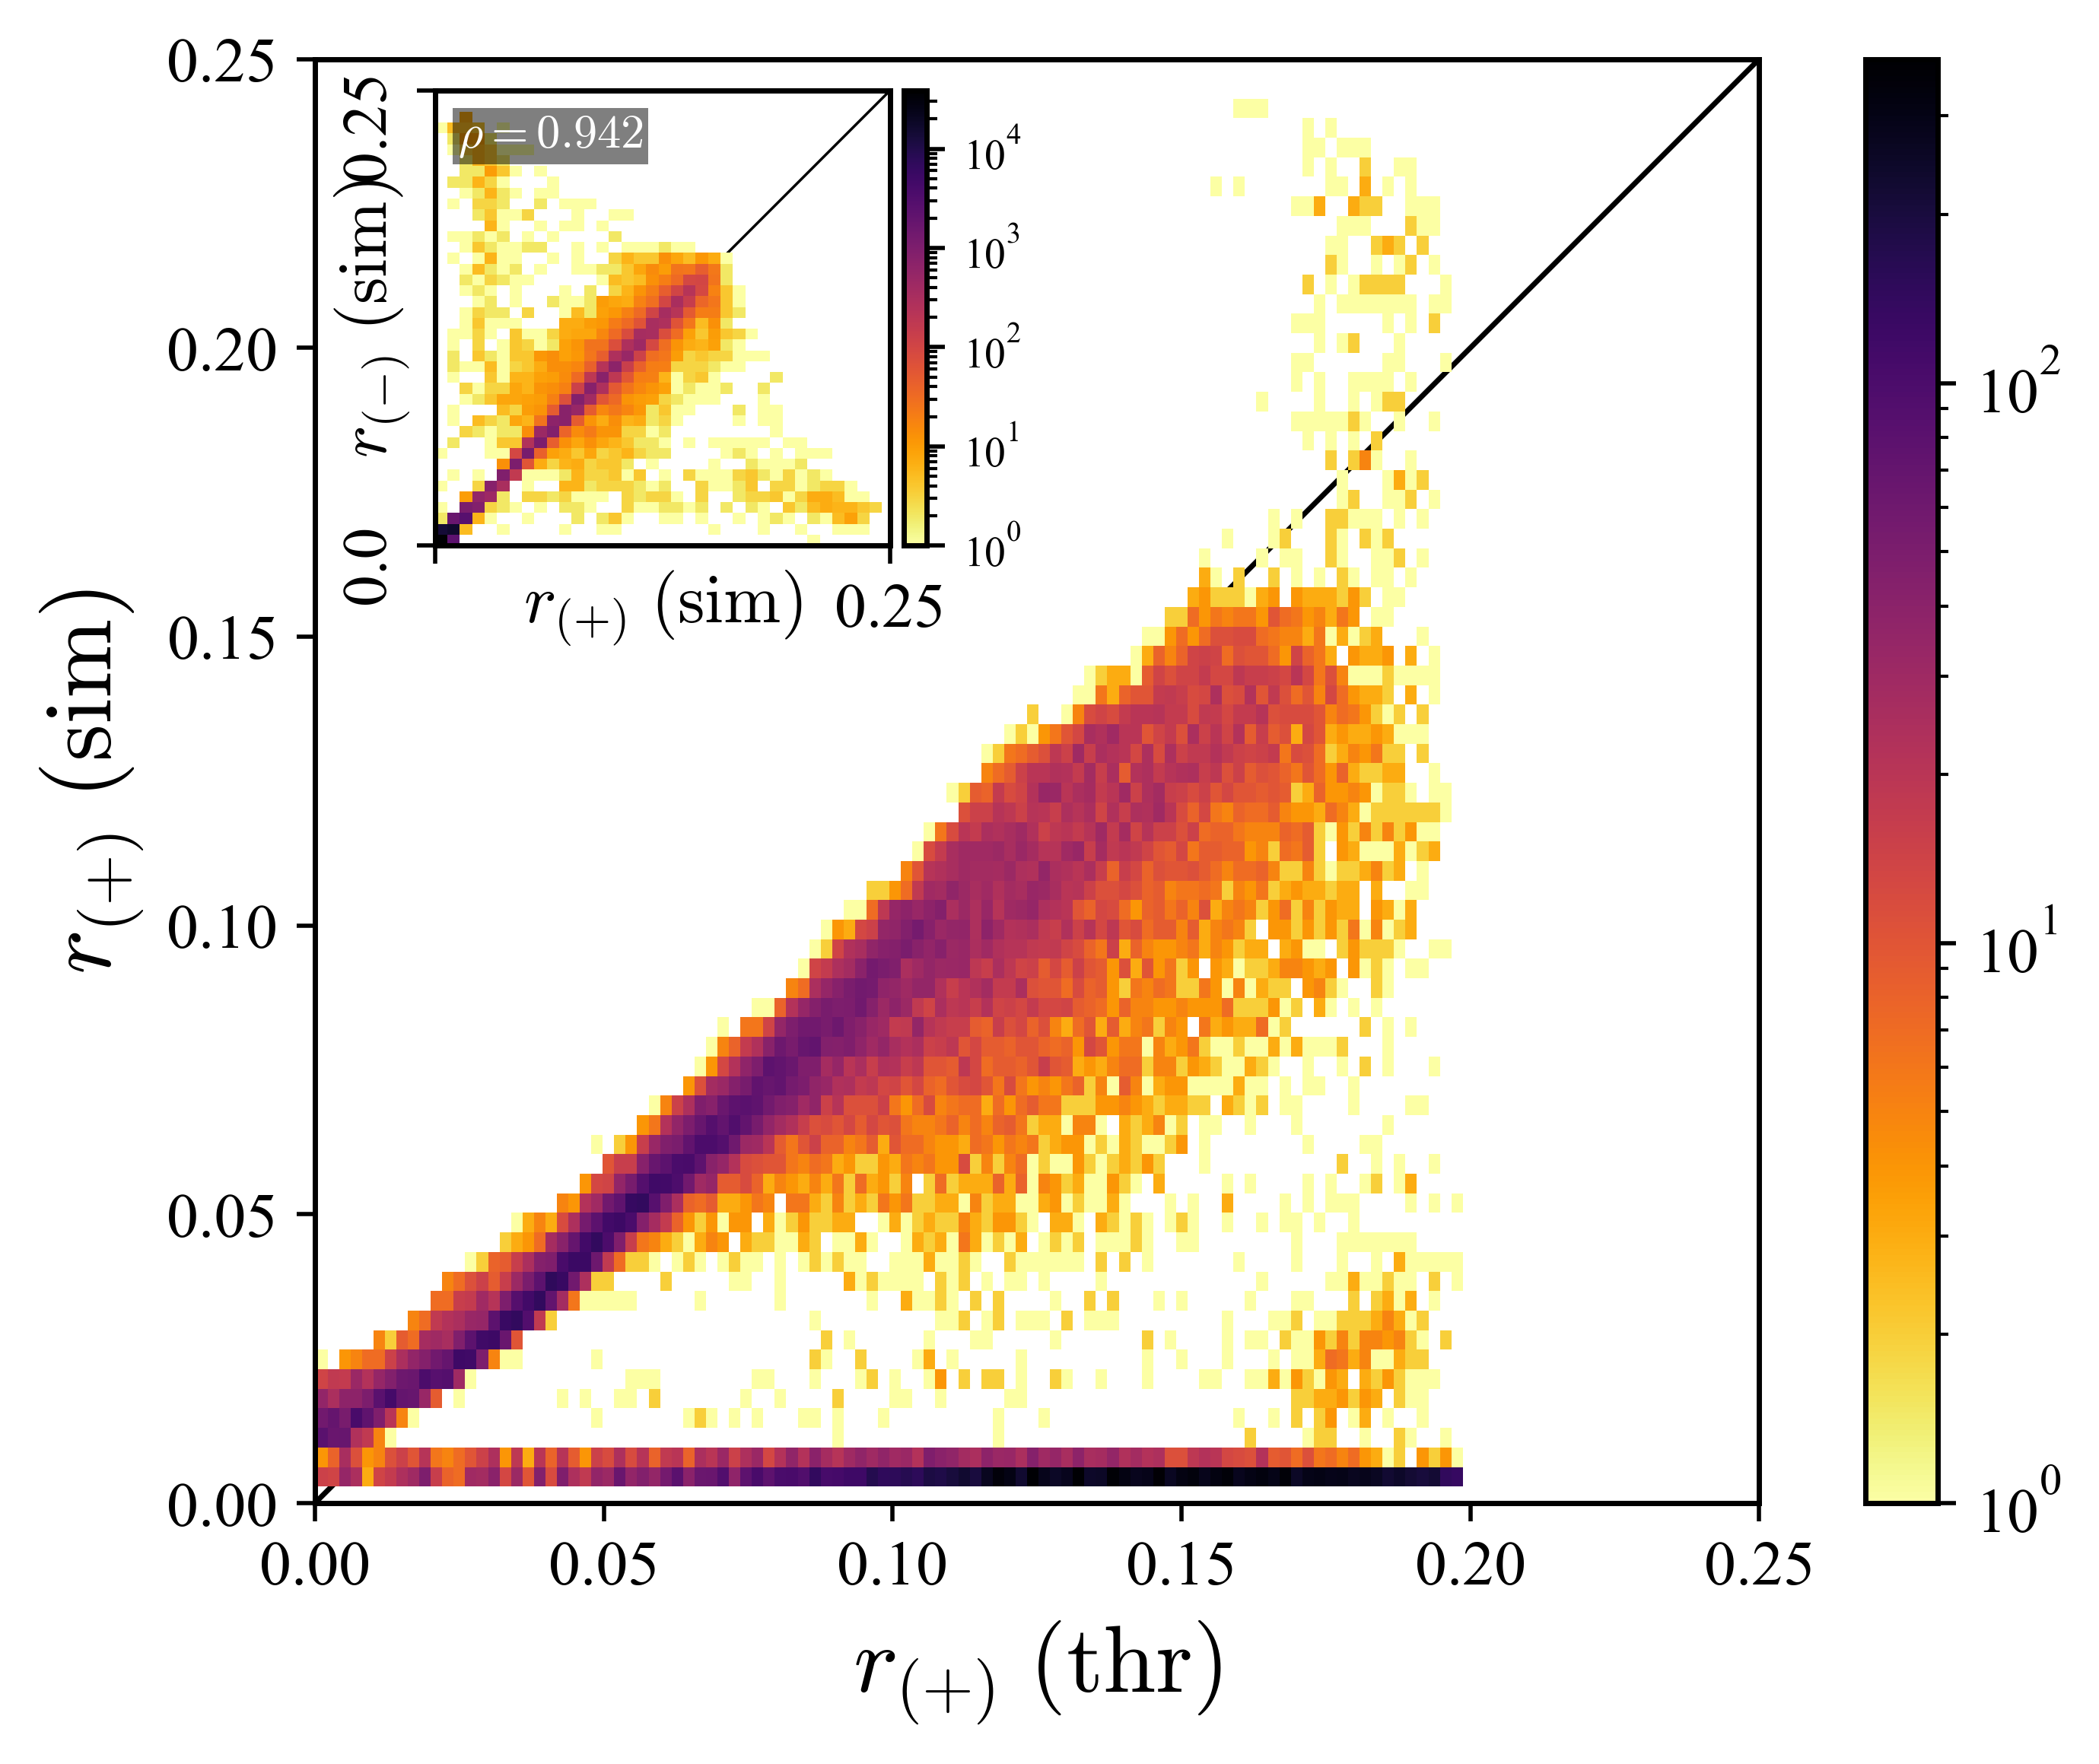

In [21]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)

conds = np.isnan(RP_sims.flatten())|np.isnan(RP_thrs.flatten())
hist = ax.hist2d(RP_thrs.flatten()[~conds],RP_sims.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
ax.set_aspect('equal', adjustable='box')
ax.set_ylim(0,0.25)
ax.set_xlim(0,0.25)
ax.plot(ax.get_xlim(),ax.get_xlim(),c='k',lw=1,zorder=-10)
fig.colorbar(hist[3], ax=ax)

ax.set_xlabel(r'$r_{(+)}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}$ $(\rm{sim})$', fontsize=18)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.48, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(RP_sims) & ~np.isnan(RM_sims)
P_sims = RP_sims[valid_indices]
M_sims = RM_sims[valid_indices]

hist = axins.hist2d(P_sims, M_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(P_sims, M_sims)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}$ $(\mathrm{sim})$', fontsize=13)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_{(-)}$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25])
axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)
plt.tight_layout()
plt.show()


/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/2292314143.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


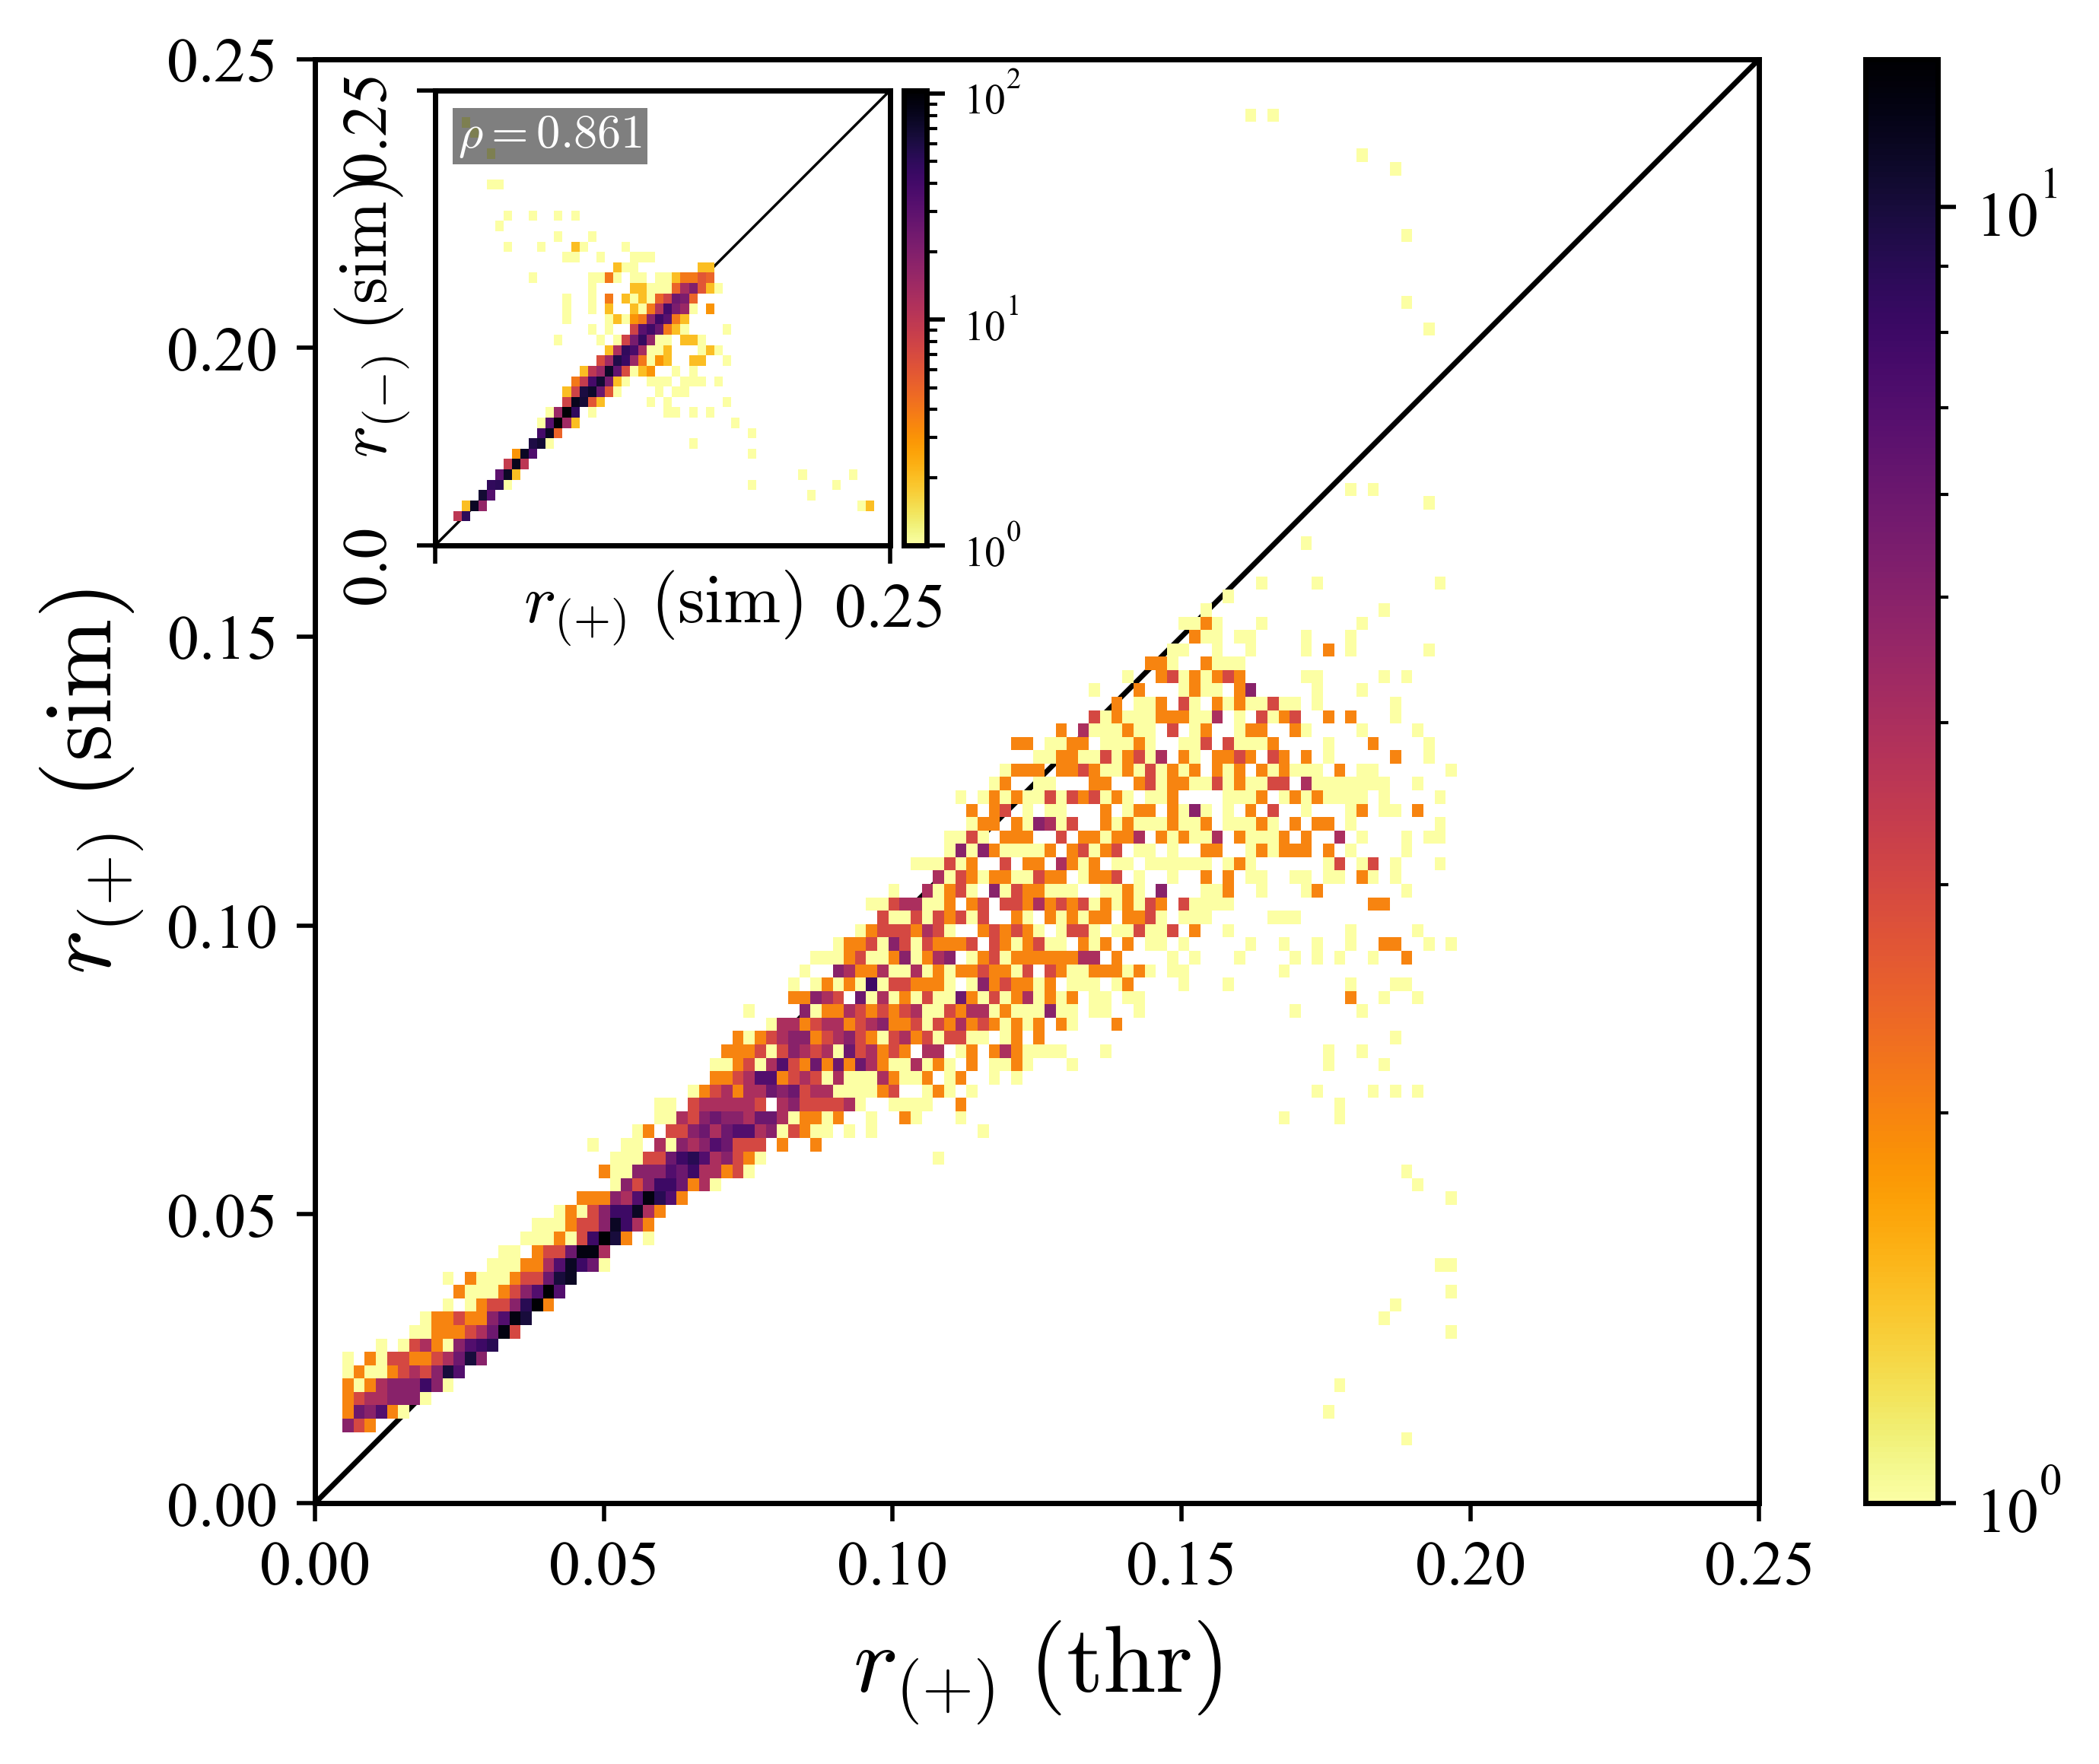

In [22]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)

conds = np.isnan(M_RPs.flatten())|np.isnan(RP_thrs[0].flatten())
hist = ax.hist2d(RP_thrs[0].flatten()[~conds],M_RPs.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
ax.set_aspect('equal', adjustable='box')
ax.set_ylim(0,0.25)
ax.set_xlim(0,0.25)
ax.plot(ax.get_xlim(),ax.get_xlim(),c='k',lw=1,zorder=-10)
fig.colorbar(hist[3], ax=ax)

ax.set_xlabel(r'$r_{(+)}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}$ $(\rm{sim})$', fontsize=18)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.48, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(M_RPs) & ~np.isnan(M_RMs)
P_sims = M_RPs[valid_indices]
M_sims = M_RMs[valid_indices]

hist = axins.hist2d(P_sims, M_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(P_sims, M_sims)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}$ $(\mathrm{sim})$', fontsize=13)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_{(-)}$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25])
axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)
plt.tight_layout()
plt.show()


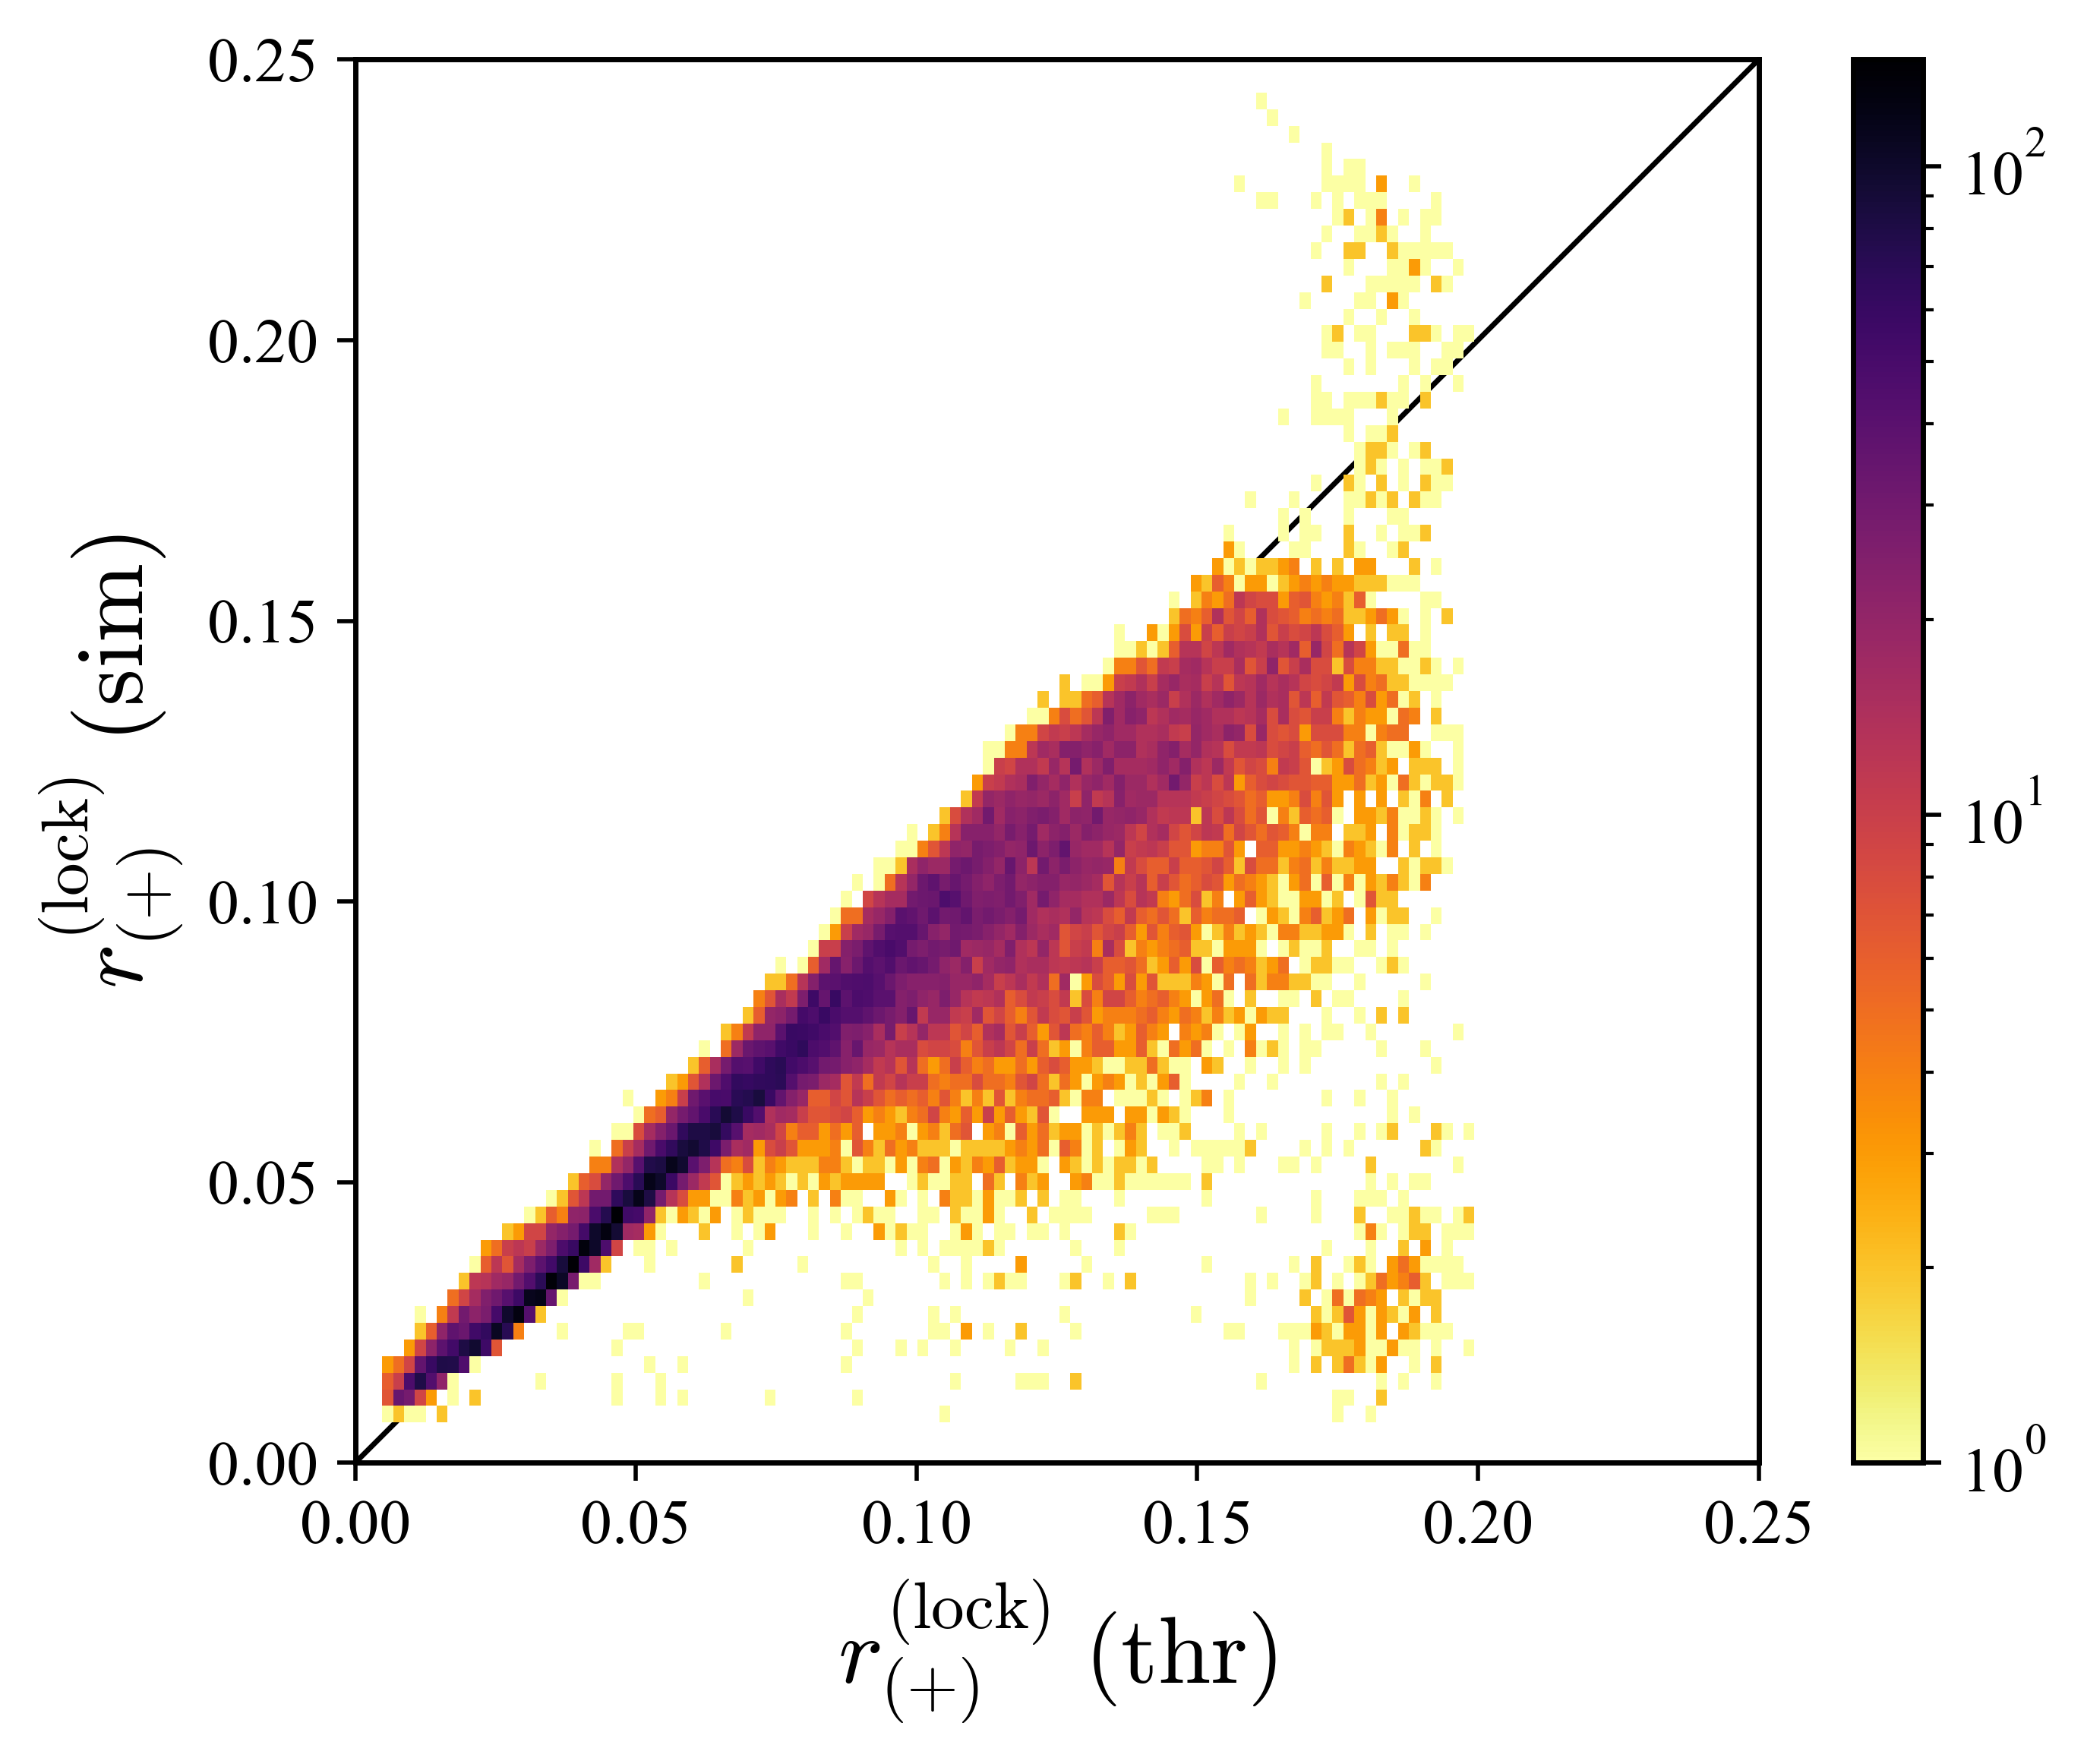

In [23]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)

conds = np.isnan(RPL_sims.flatten())|np.isnan(RPL_thrs.flatten())
hist = ax.hist2d(RPL_thrs.flatten()[~conds],RPL_sims.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
ax.set_aspect('equal', adjustable='box')
ax.set_ylim(0,0.25)
ax.set_xlim(0,0.25)
ax.plot(ax.get_xlim(),ax.get_xlim(),c='k',lw=1,zorder=-10)
fig.colorbar(hist[3], ax=ax)

ax.set_xlabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{sim})$', fontsize=18)


plt.show()


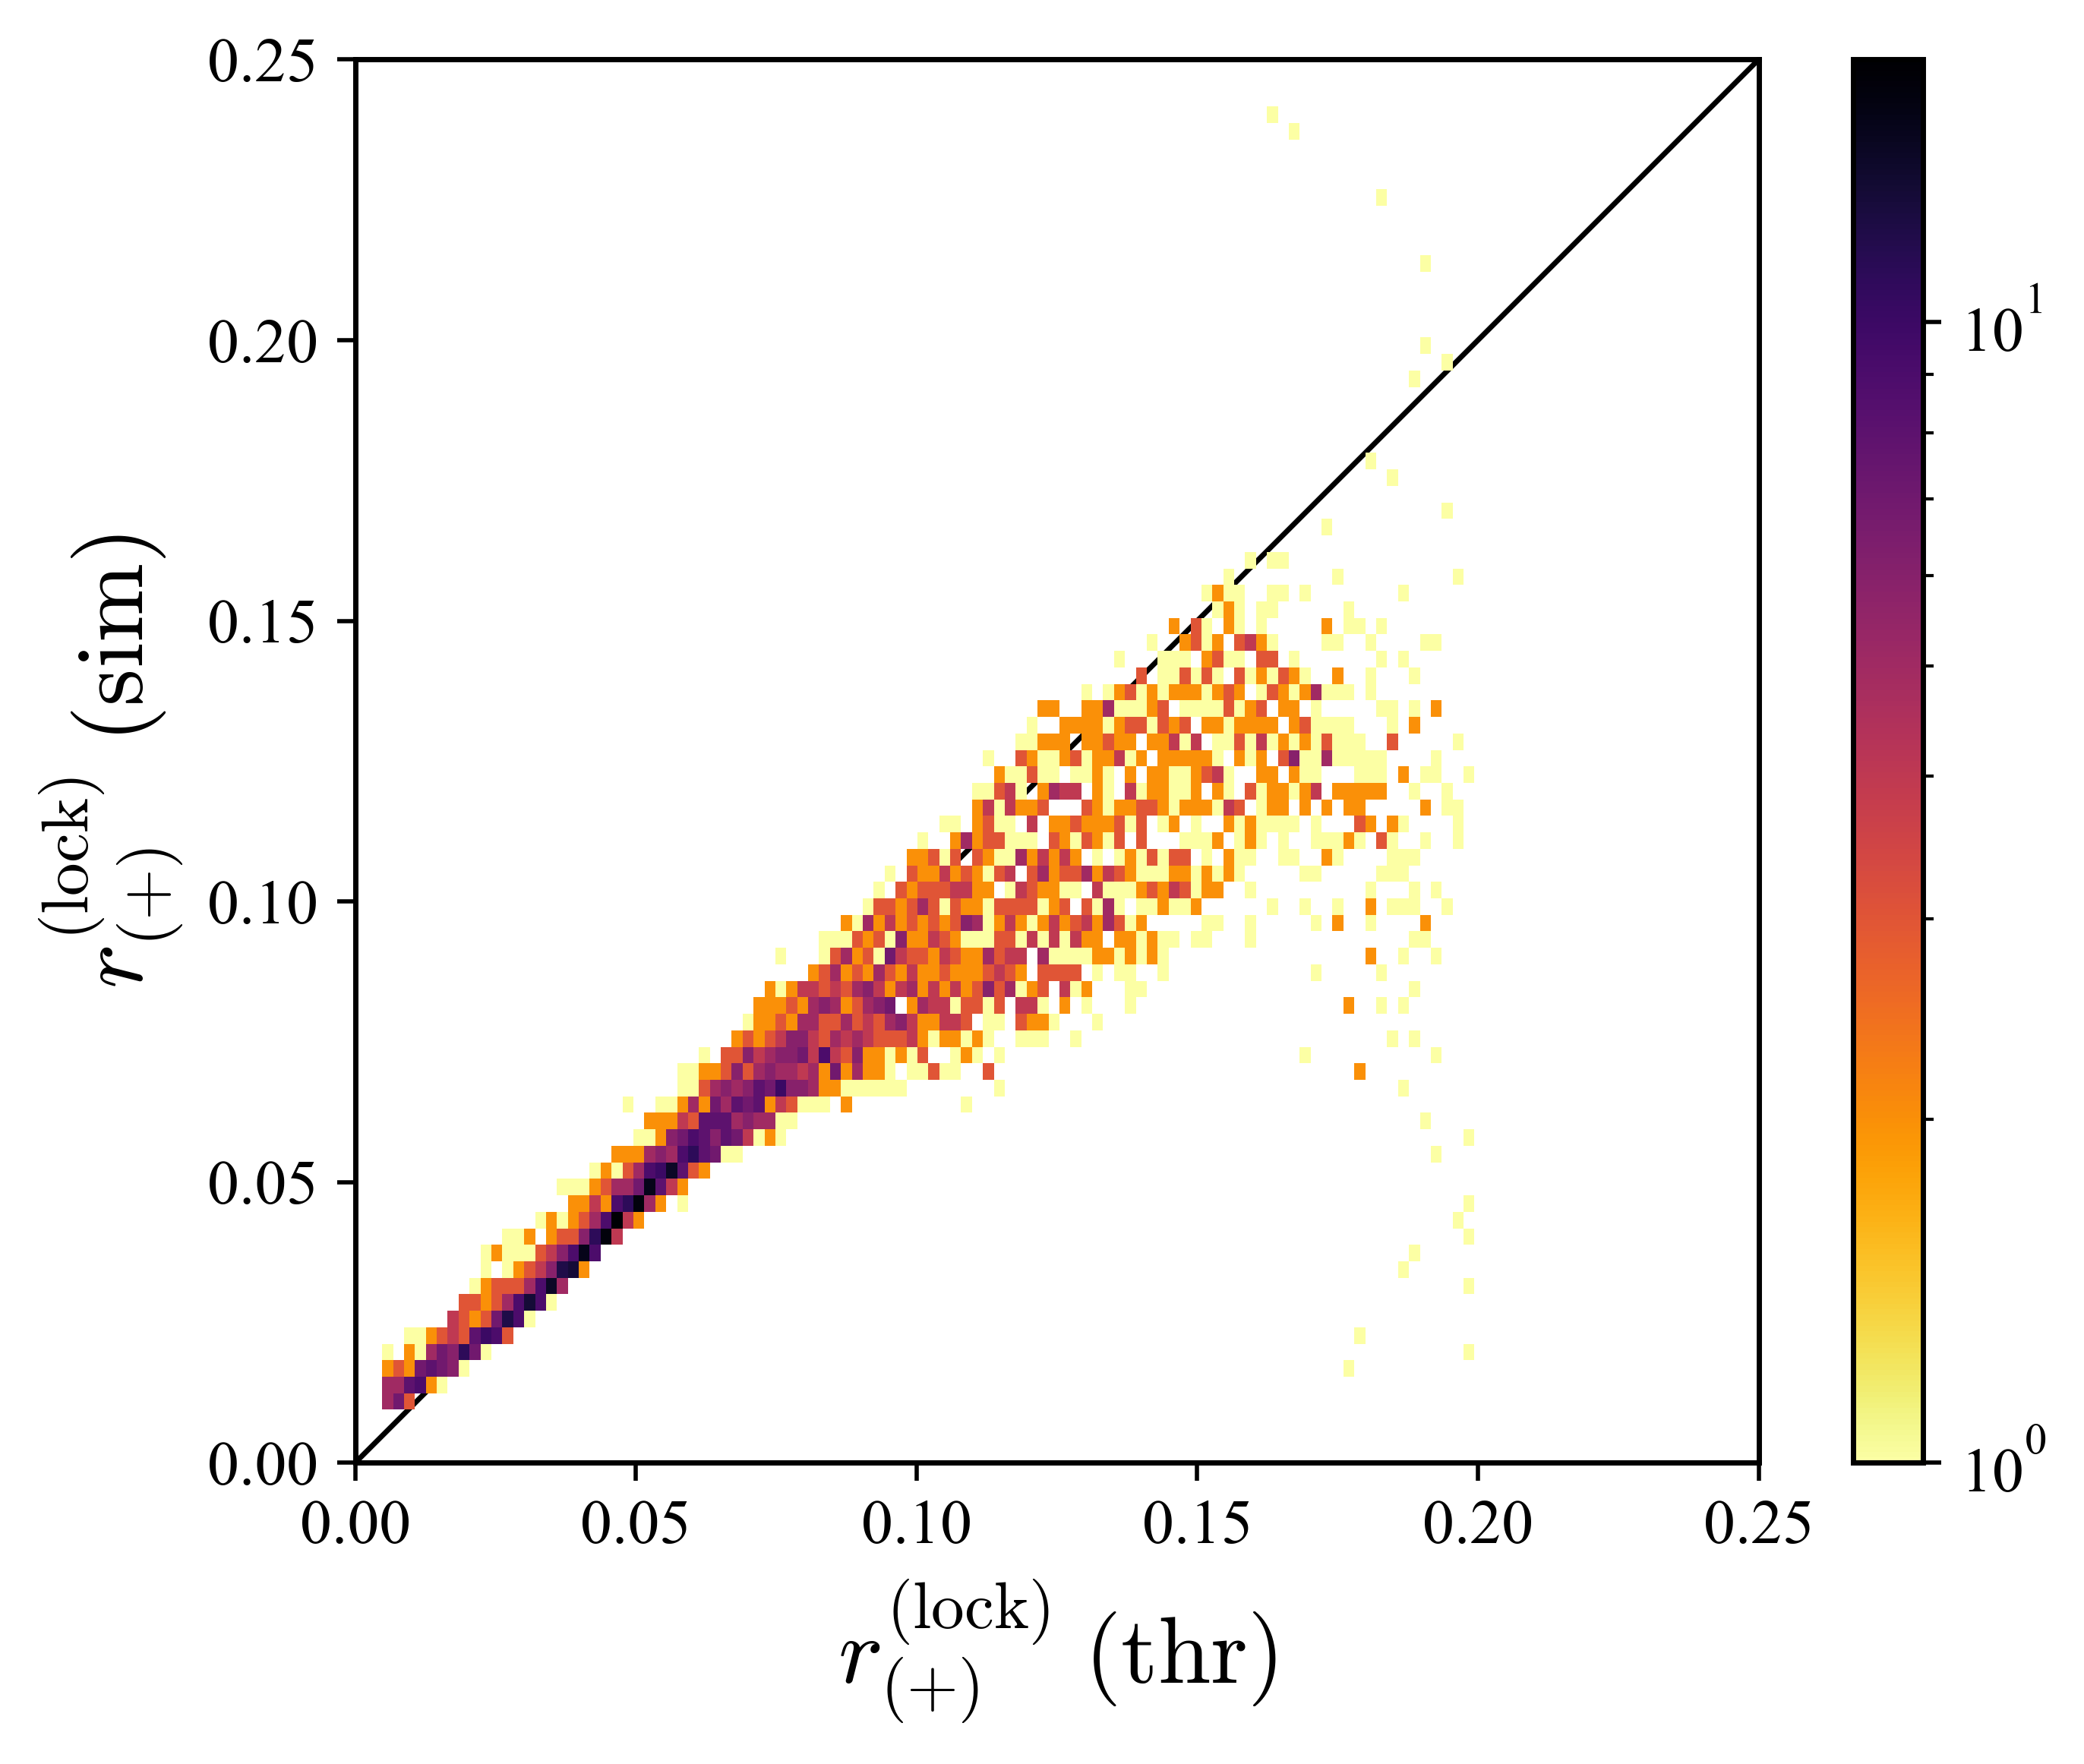

In [24]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)

conds = np.isnan(M_RPLs.flatten())|np.isnan(RPL_thrs[0].flatten())
hist = ax.hist2d(RPL_thrs[0].flatten()[~conds],M_RPLs.flatten()[~conds],bins=100,cmap='inferno_r',norm=mcolors.LogNorm());
ax.set_aspect('equal', adjustable='box')
ax.set_ylim(0,0.25)
ax.set_xlim(0,0.25)
ax.plot(ax.get_xlim(),ax.get_xlim(),c='k',lw=1,zorder=-10)
fig.colorbar(hist[3], ax=ax)

ax.set_xlabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{sim})$', fontsize=18)


plt.show()


/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/1881895692.py:7: RuntimeWarning: Mean of empty slice
  pcm = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25,cmap='magma')
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/1881895692.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


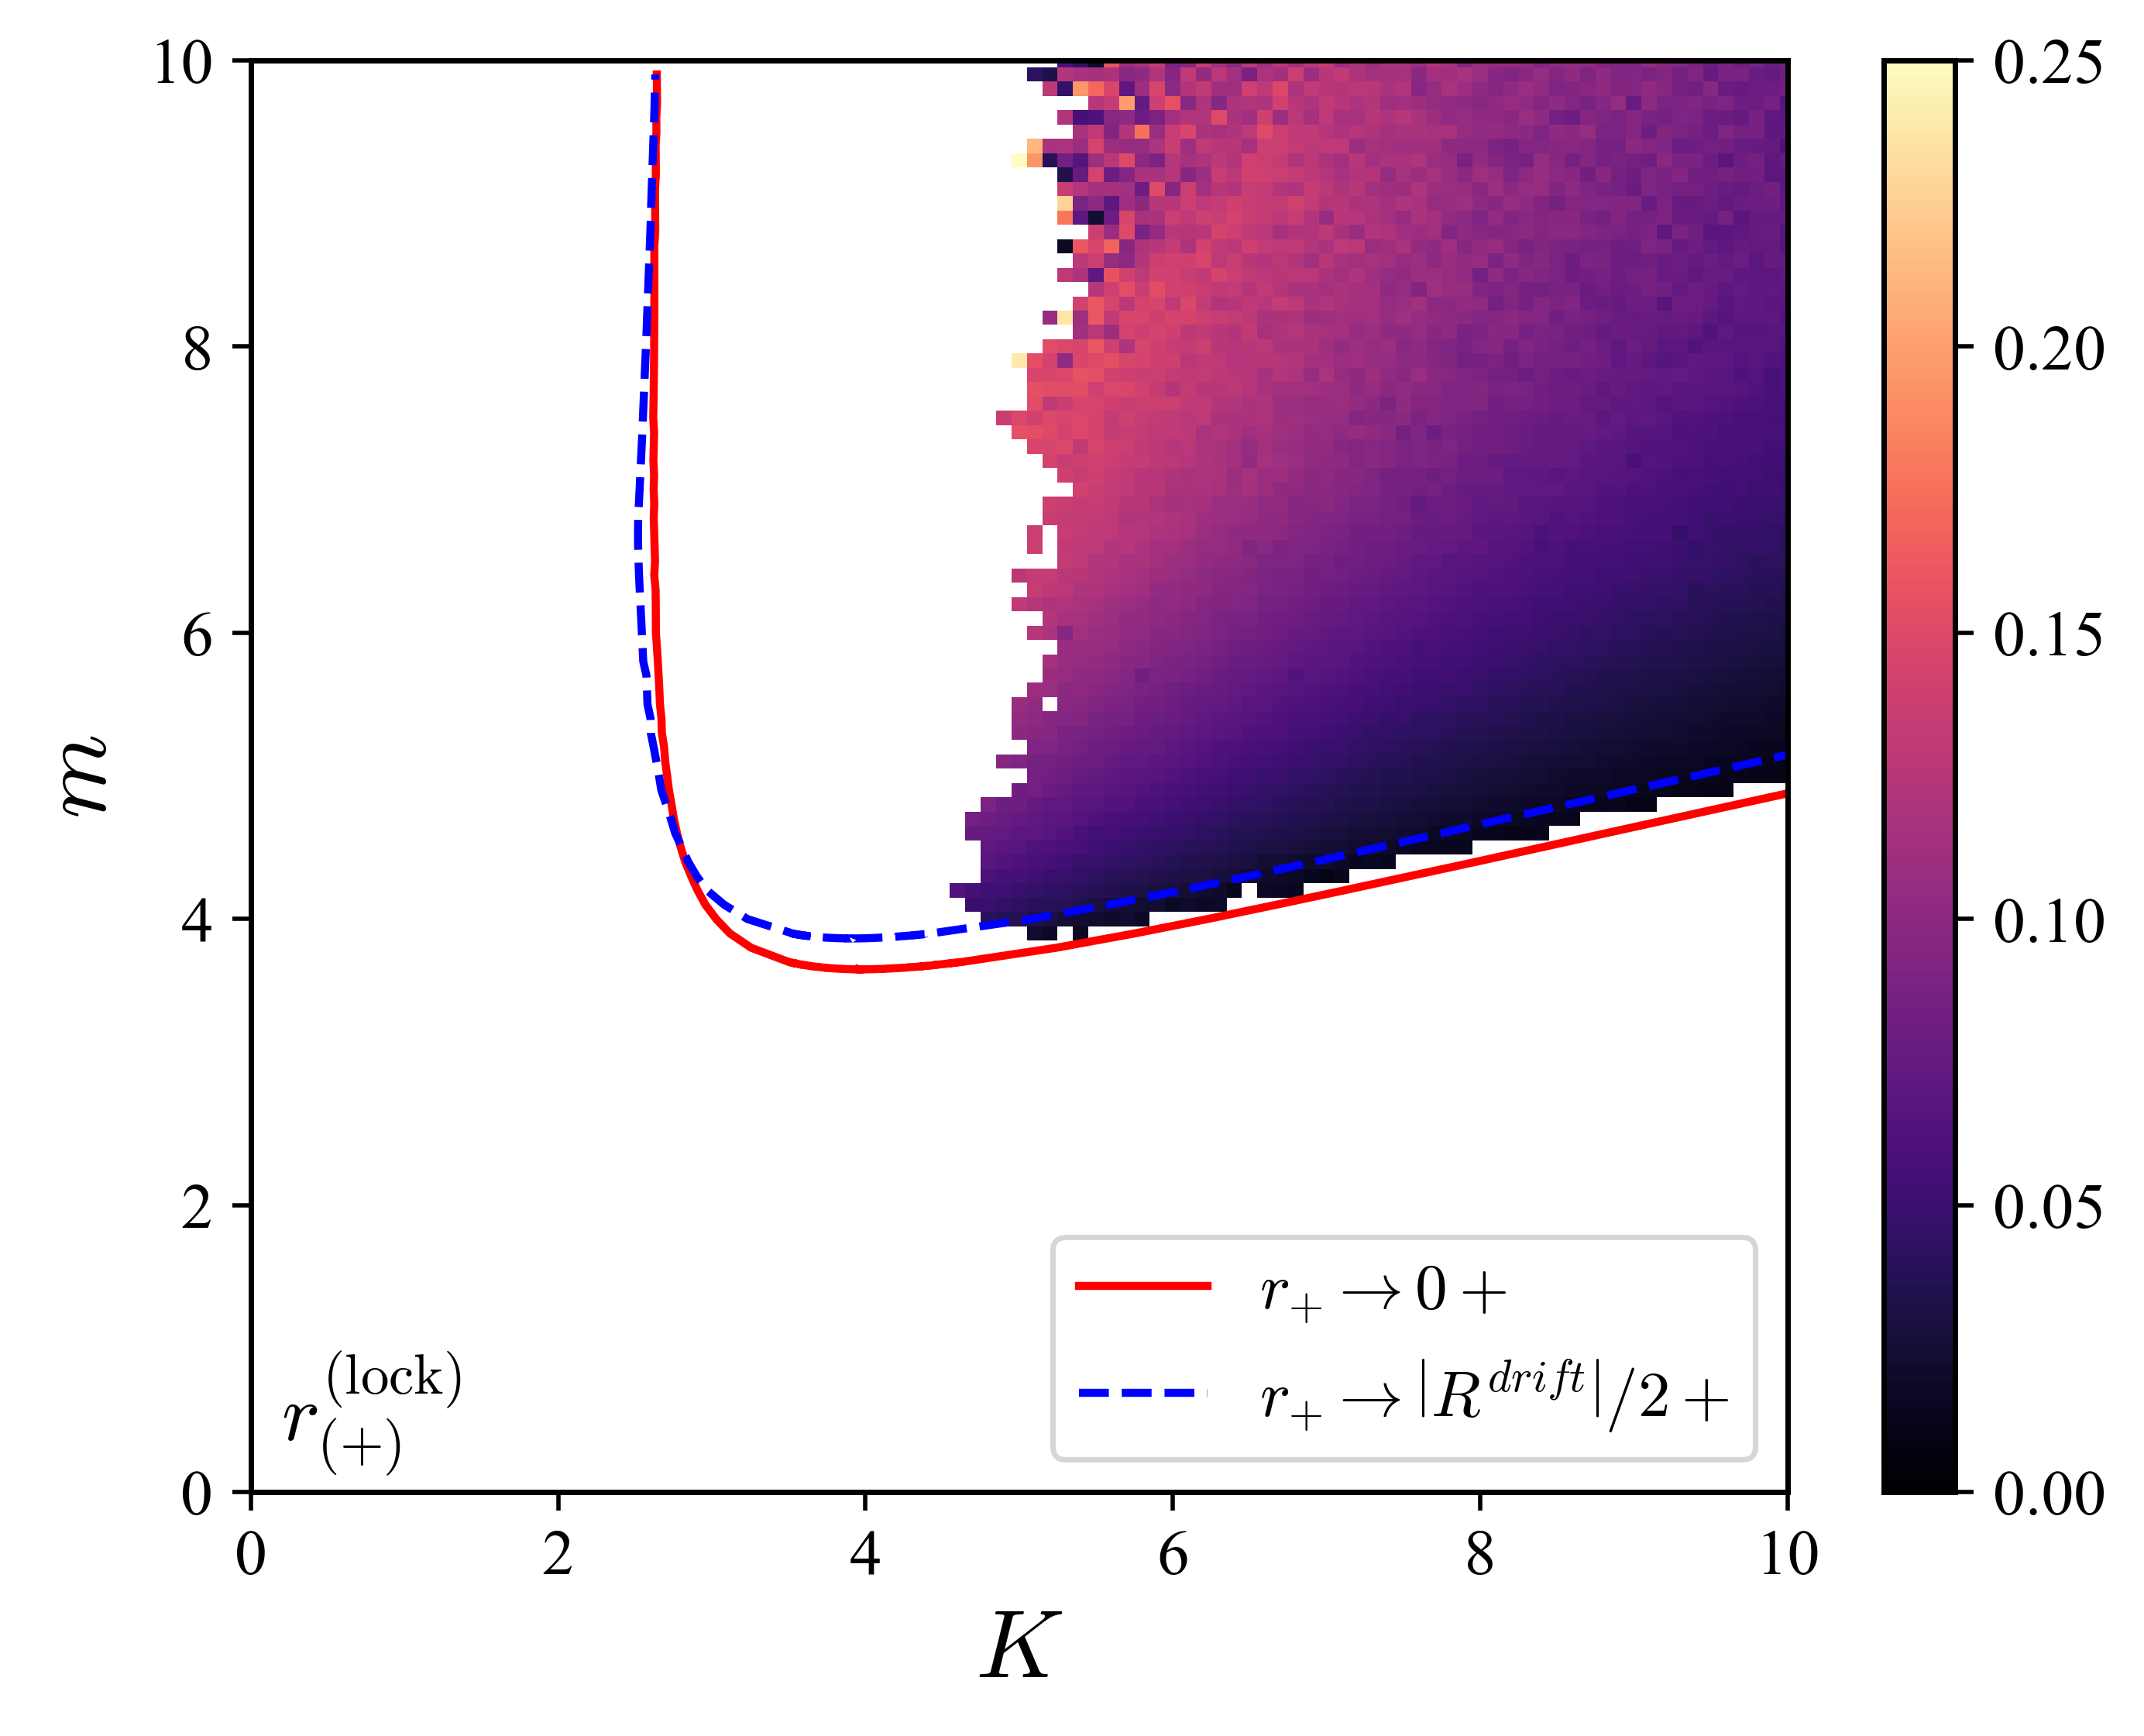

In [25]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.patches as mpatches
# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25,cmap='magma')
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}\rightarrow 0+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$r_{(+)}^{(\rm{lock})}$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="black",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)

cmap = cm.get_cmap('magma')
color_middle = cmap(0.6)  # colormap에서 중간색 선택

patch = mpatches.Patch(color=color_middle, label=r'$r_{+}^{(lock)}$')

# legend에 라인 + patch 같이 넣기
plt.legend(loc=4)
# plt.legend(handles=[patch] + plt.gca().get_legend_handles_labels()[0],loc=3)

plt.show()


/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/4034214161.py:7: RuntimeWarning: Mean of empty slice
  pcm = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25,cmap='magma')
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_92897/4034214161.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


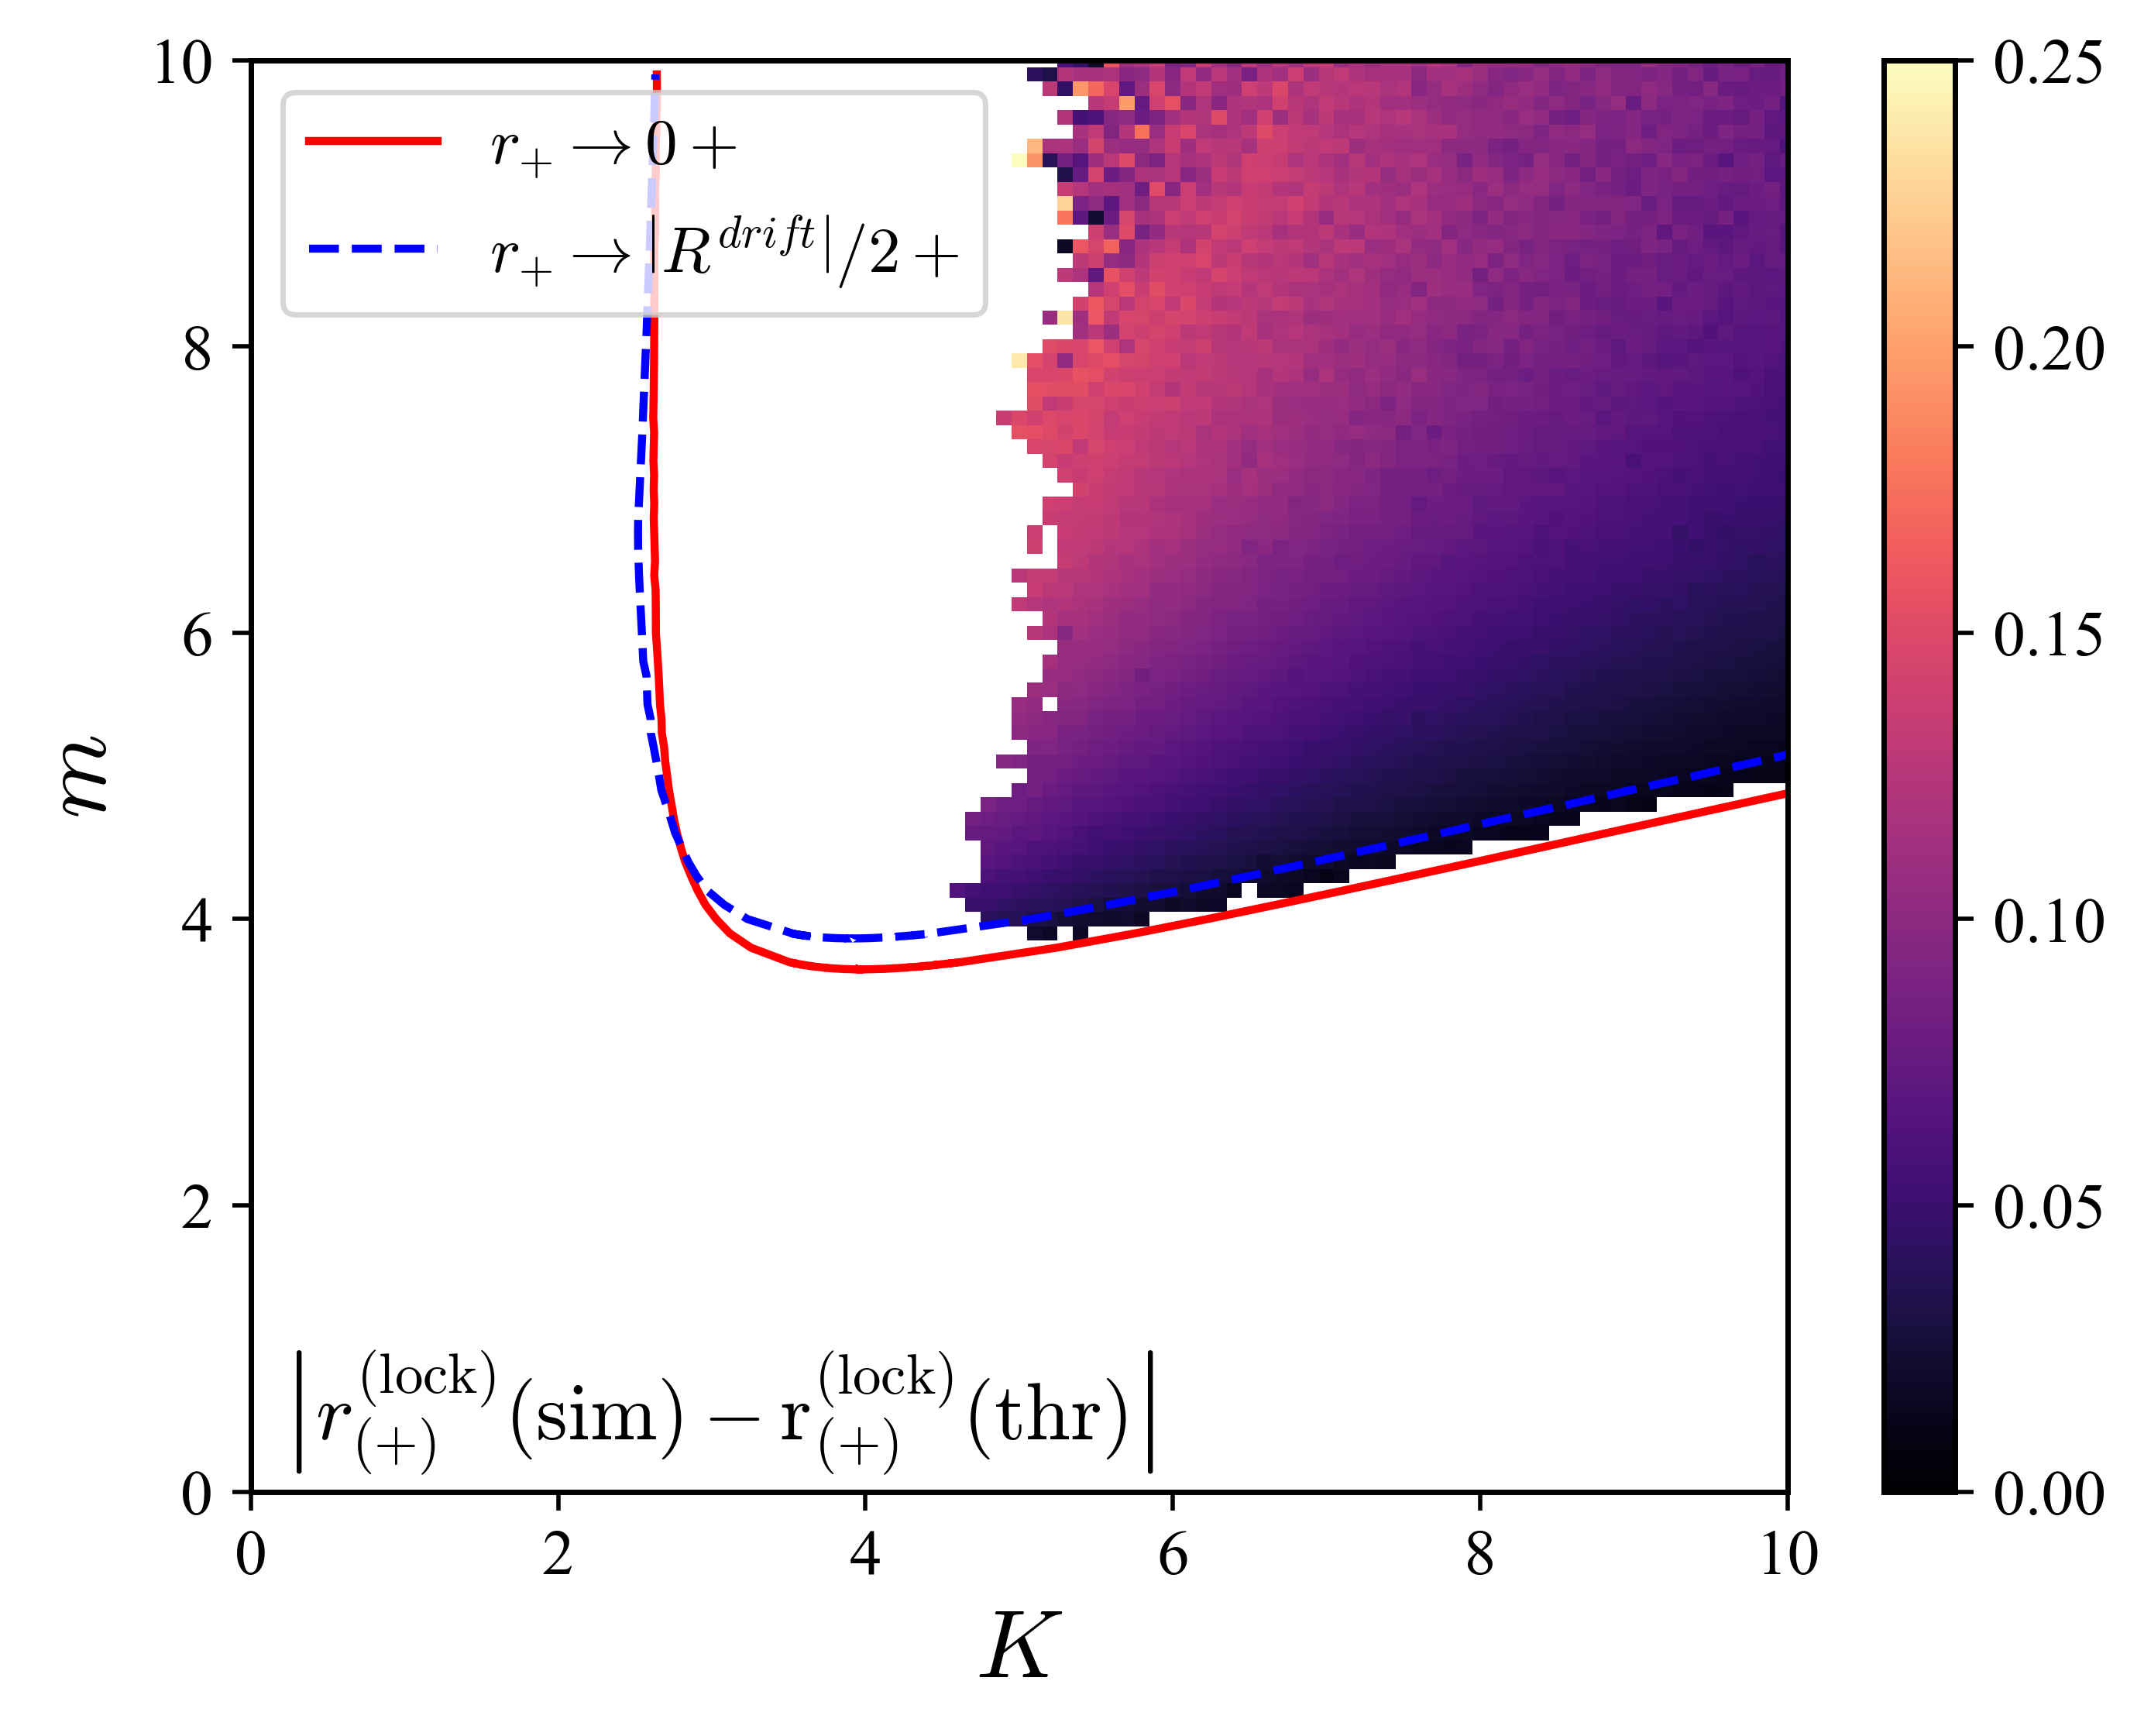

In [26]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.patches as mpatches
# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25,cmap='magma')
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}\rightarrow 0+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$\left|r_{(+)}^{(\rm{lock})}(\rm{sim})-r_{(+)}^{(\rm{lock})}(\rm{thr})\right|$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="black",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)

cmap = cm.get_cmap('magma')
color_middle = cmap(0.6)  # colormap에서 중간색 선택

patch = mpatches.Patch(color=color_middle, label=r'$r_{+}^{(lock)}$')

# legend에 라인 + patch 같이 넣기
plt.legend(loc=2)
# plt.legend(handles=[patch] + plt.gca().get_legend_handles_labels()[0],loc=3)

plt.show()


In [27]:
RSTDS.shape

NameError: name 'RSTDS' is not defined

NameError: name 'RSTDS' is not defined

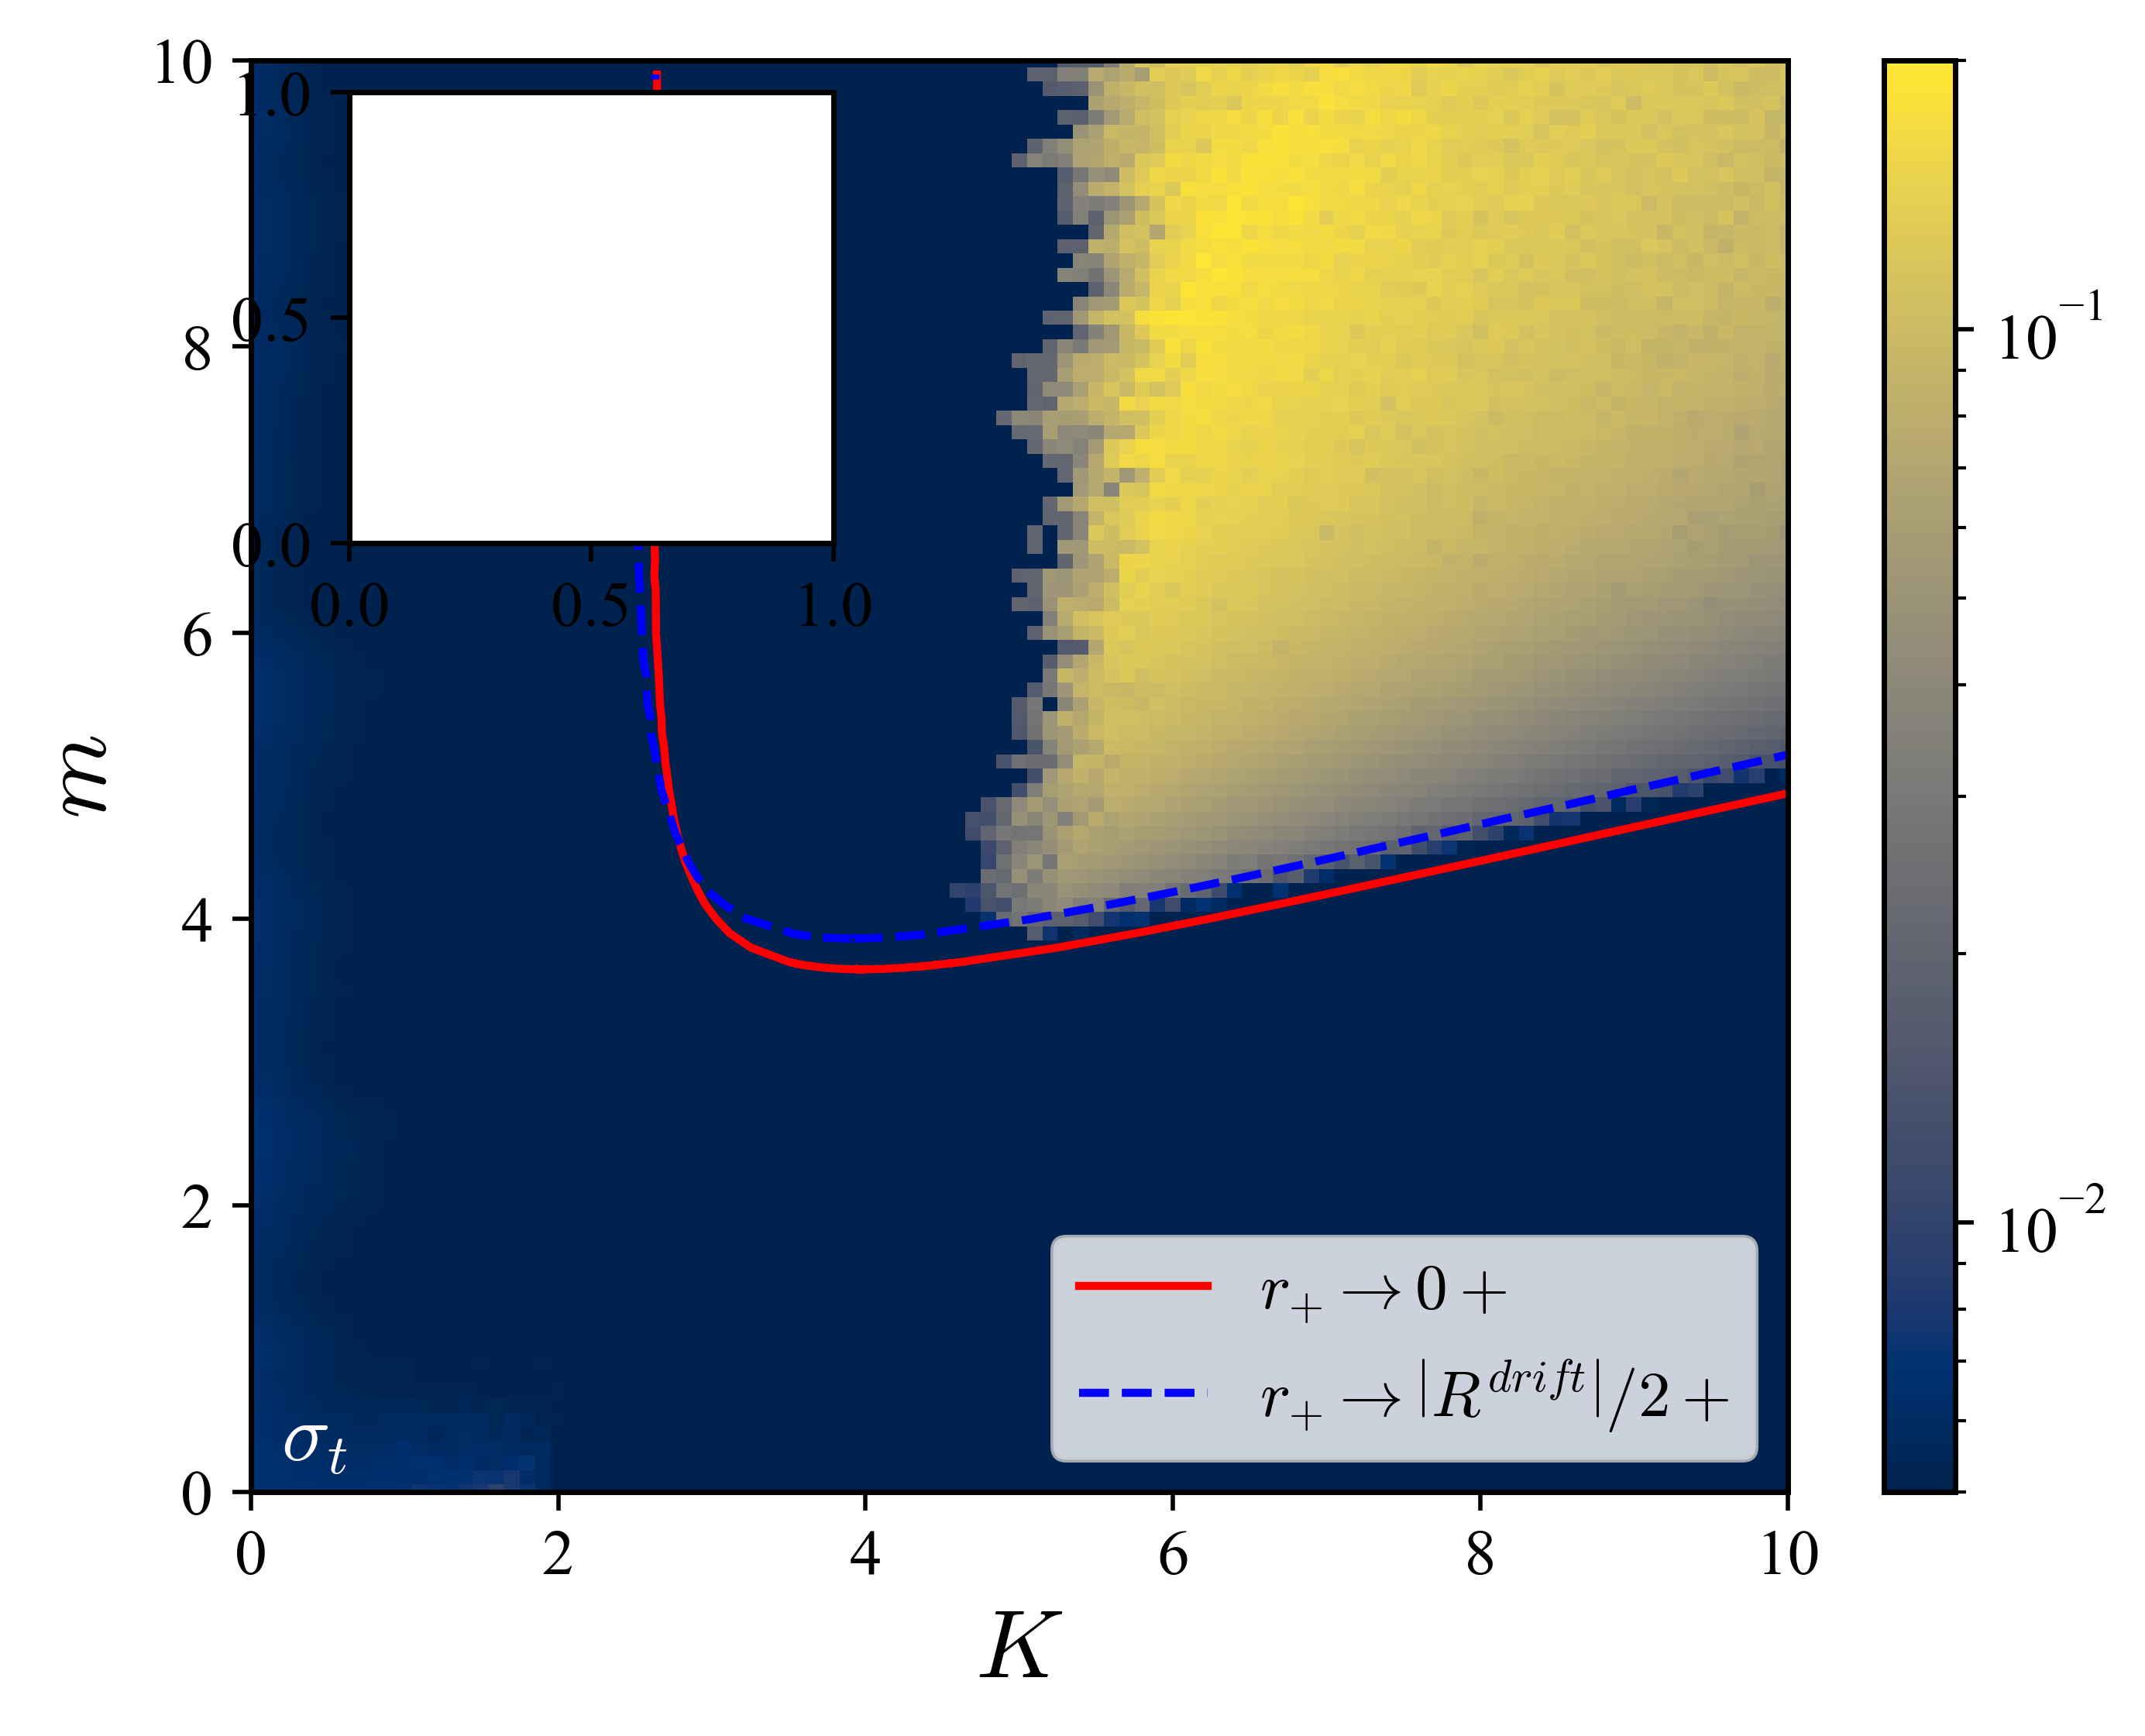

In [ ]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
# pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstd_new, axis=0), vmin=0, vmax=0.25,cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstds, axis=0), cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}\rightarrow 0+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$\sigma_t$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="white",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)
plt.legend(loc=4)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

A,B =  RSTDS,Rstd_new
valid_indices = ~np.isnan(A) & ~np.isnan(B)
F_thrs = A[valid_indices]
F_sims = B[valid_indices]

hist = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(A, B)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_0$ $(\mathrm{thr})$', fontsize=13)
xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0,alpha=0.3))
axins.set_ylabel(r'$r_0$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)


axins.tick_params(axis='both', colors='white')     # x, y tick 글자 흰색
axins.xaxis.label.set_color('white')               # x축 라벨 흰색
axins.yaxis.label.set_color('white')               # y축 라벨 흰색
for spine in axins.spines.values():                # 축 테두리 선 색상
    spine.set_edgecolor('white')

# colorbar 글씨도 흰색으로
cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
cb.outline.set_edgecolor('white')


# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)
cb.ax.yaxis.set_tick_params(color='white', which='both')  # 눈금선 색상
plt.setp(cb.ax.get_yticklabels(minor=False), color='white')  # 큰 tick 라벨
plt.setp(cb.ax.get_yticklabels(minor=True), color='white')   # 작은 tick 라벨
cb.outline.set_edgecolor('white')

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25])
axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

plt.show()


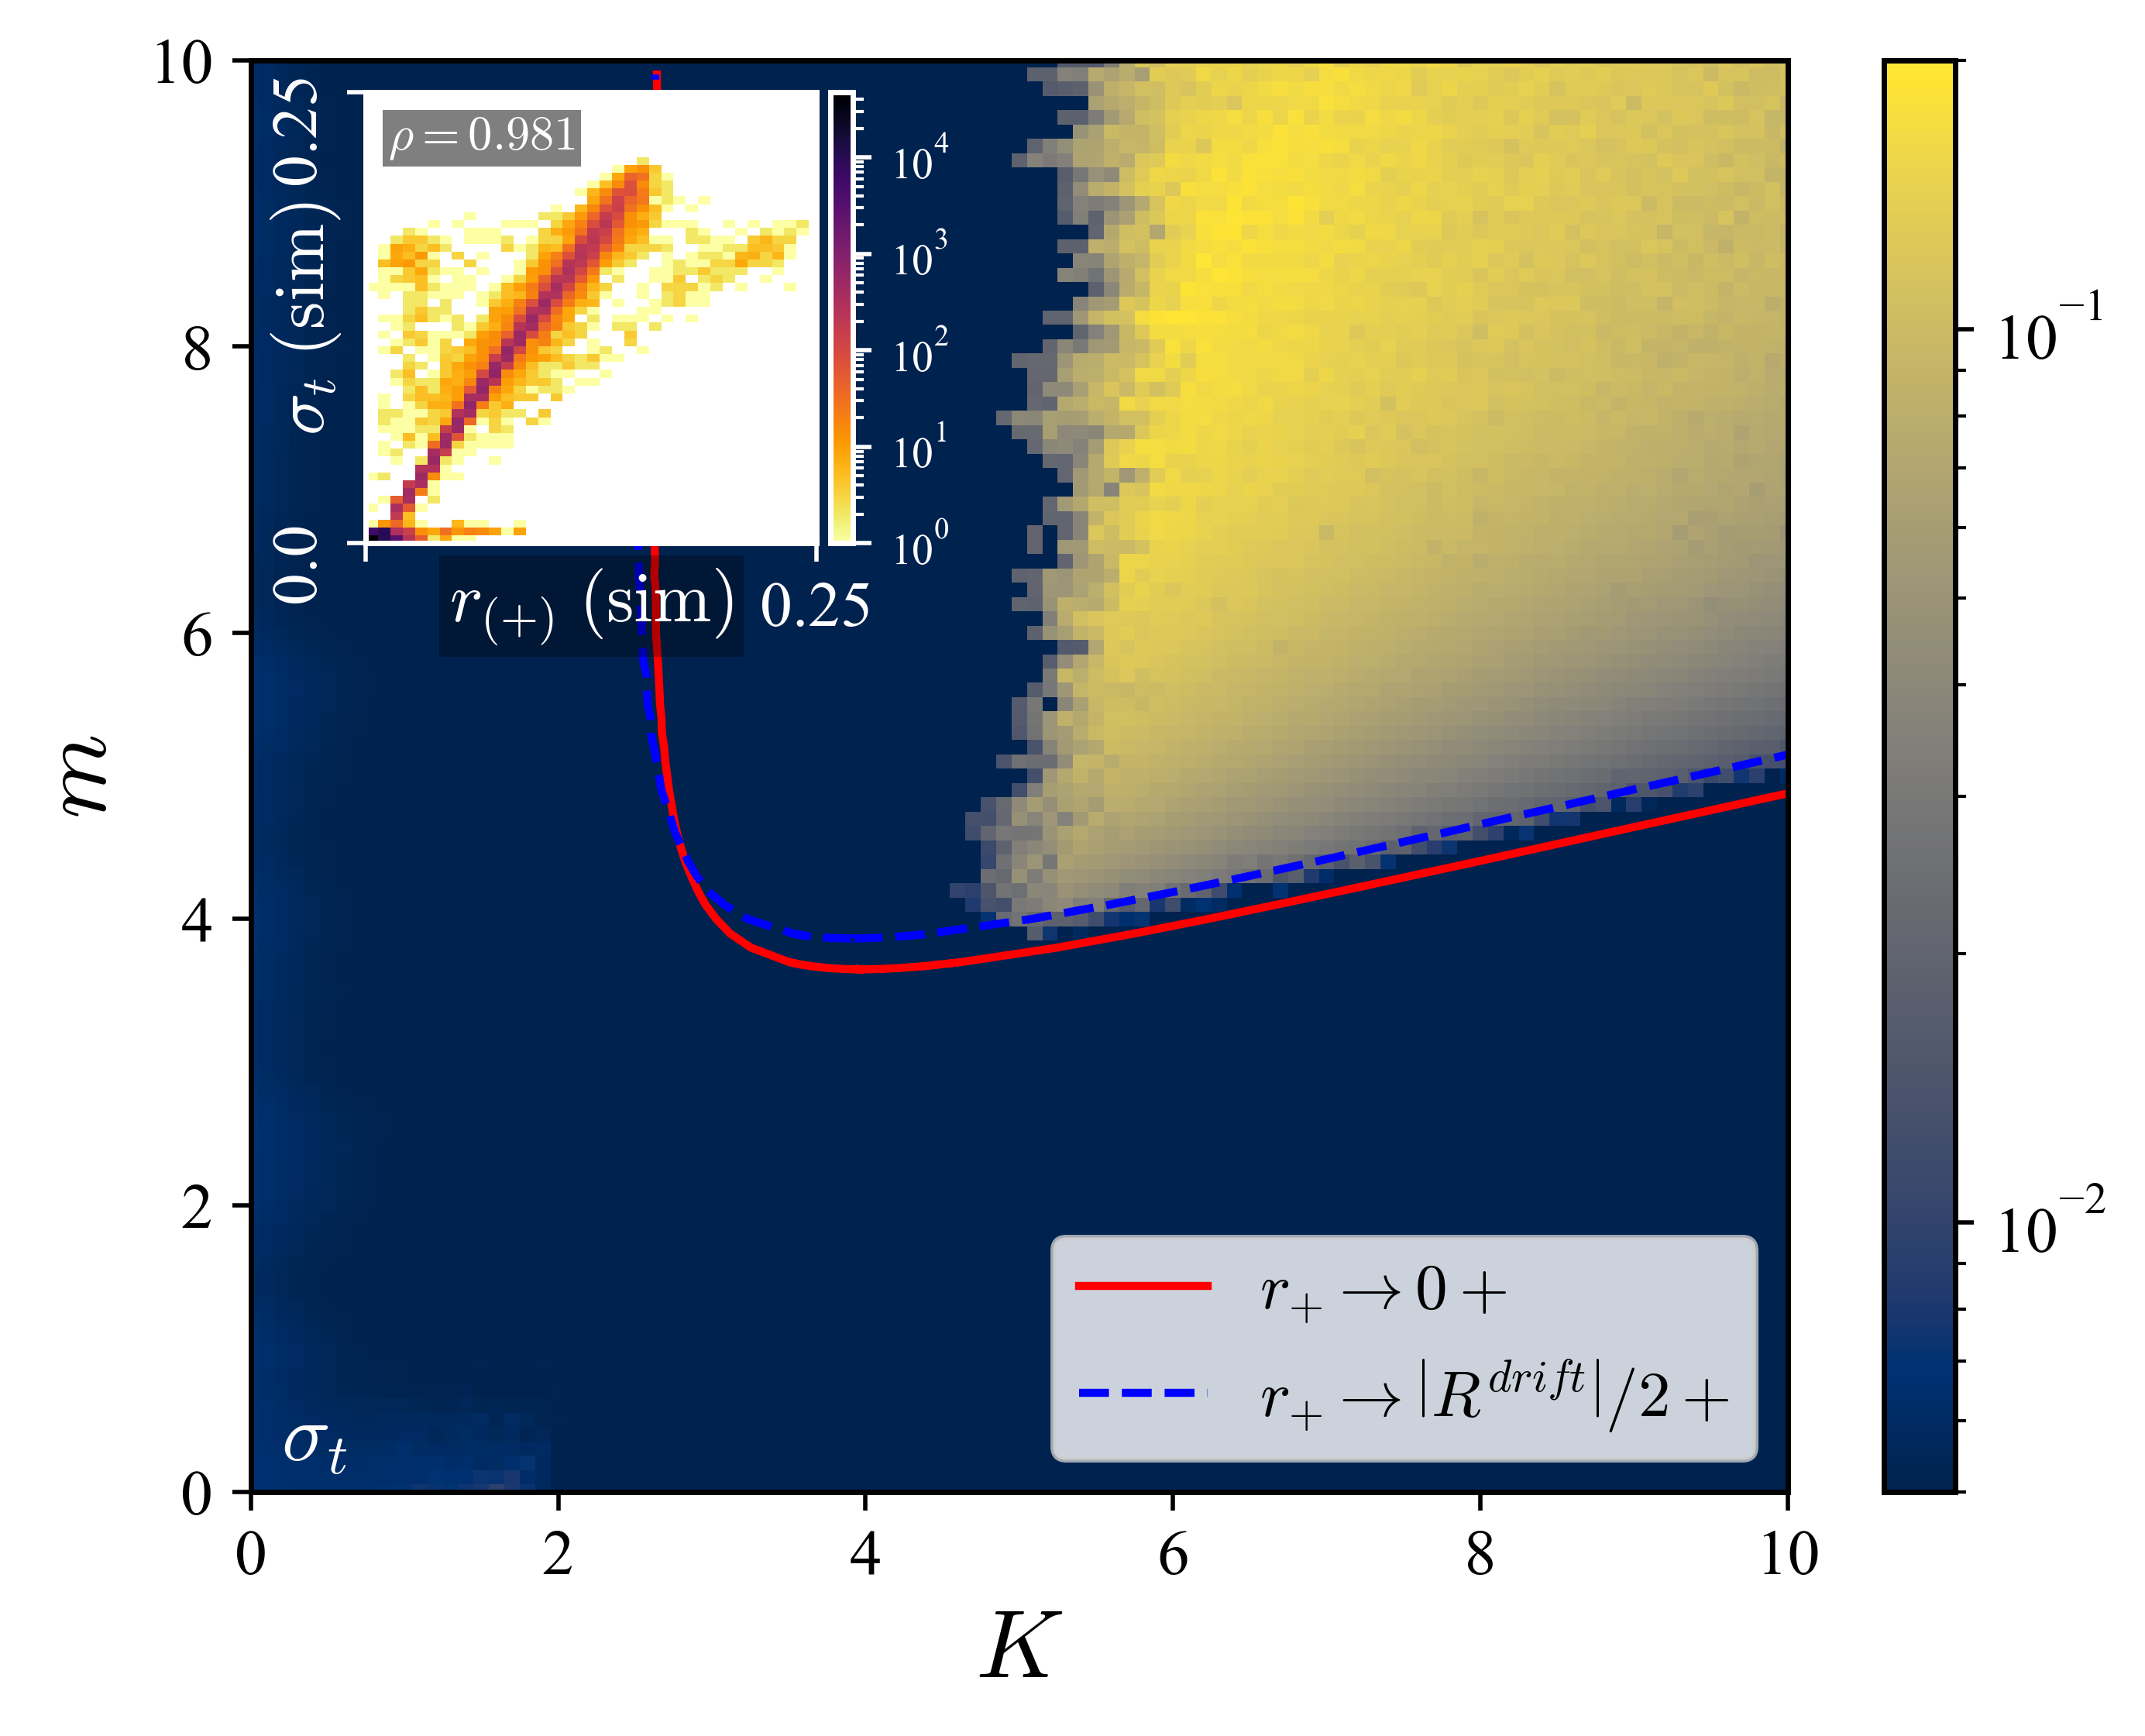

In [ ]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
# pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstd_new, axis=0), vmin=0, vmax=0.25,cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstds, axis=0), cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}\rightarrow 0+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$\sigma_t$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="white",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)
plt.legend(loc=4)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

A,B =  RPs,Rstds
valid_indices = ~np.isnan(A) & ~np.isnan(B)
F_thrs = A[valid_indices]
F_sims = B[valid_indices]

hist = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(A, B)
lims = (0.0, 0.25)
# axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}$ $(\mathrm{sim})$', fontsize=13)
xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0,alpha=0.3))
axins.set_ylabel(r'$\sigma_t$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)


axins.tick_params(axis='both', colors='white')     # x, y tick 글자 흰색
axins.xaxis.label.set_color('white')               # x축 라벨 흰색
axins.yaxis.label.set_color('white')               # y축 라벨 흰색
for spine in axins.spines.values():                # 축 테두리 선 색상
    spine.set_edgecolor('white')

# colorbar 글씨도 흰색으로
cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
cb.outline.set_edgecolor('white')


# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)
cb.ax.yaxis.set_tick_params(color='white', which='both')  # 눈금선 색상
plt.setp(cb.ax.get_yticklabels(minor=False), color='white')  # 큰 tick 라벨
plt.setp(cb.ax.get_yticklabels(minor=True), color='white')   # 작은 tick 라벨
cb.outline.set_edgecolor('white')

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25])
axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

plt.show()


C:\Users\kim9y\AppData\Local\Temp\ipykernel_6044\214499575.py:51: RuntimeWarning: Mean of empty slice
  pcm_b = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_6044\214499575.py:142: RuntimeWarning: Mean of empty slice
  pcm_d = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25, cmap='magma')


NameError: name 'RSTDS' is not defined

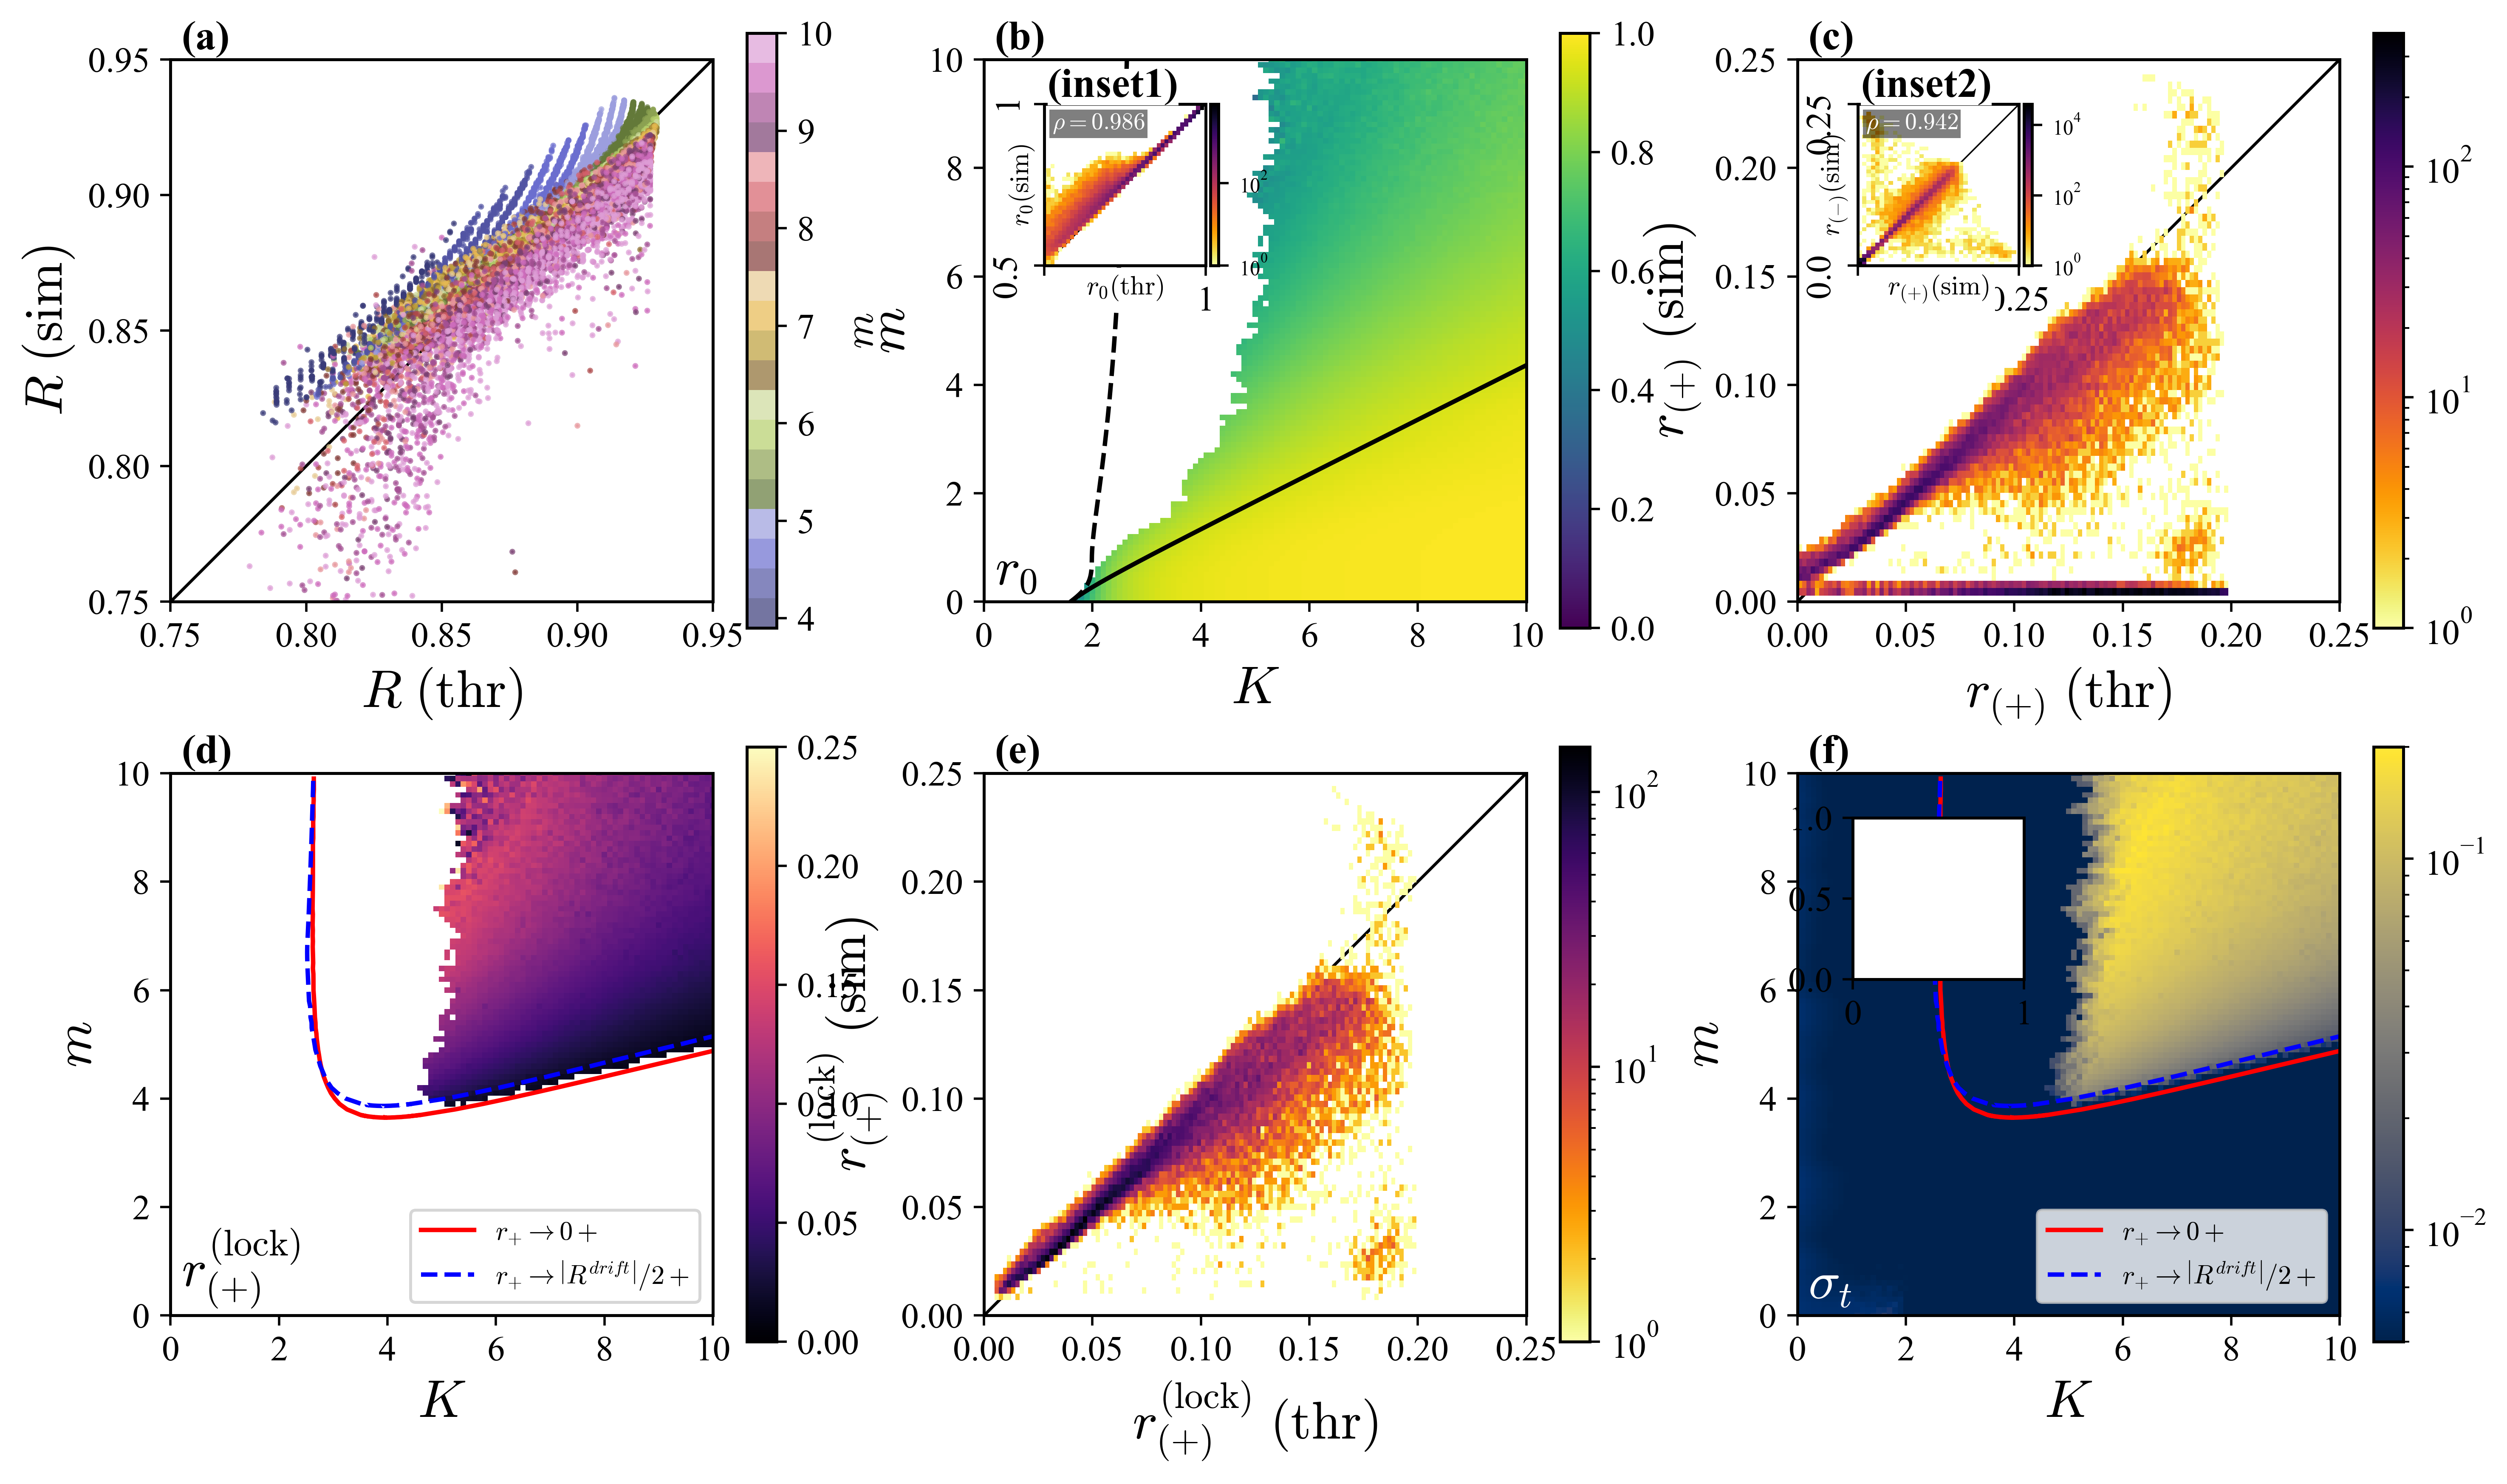

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# ----------------------------
# 0) Figure & axes 준비
# ----------------------------
fig, axes = plt.subplots(2, 3, figsize=(14, 8), dpi=500)
# 패널 라벨 도우미
def panel_label(ax, letter, dx=0.02, dy=1.07,color='black',bbox=dict(facecolor='white', edgecolor='none', pad=0.0)):
    ax.text(dx, dy, f"({letter})", transform=ax.transAxes,
            ha="left", va="top", fontsize=14, fontweight="bold",color=color,bbox=bbox)

# ========== (a) ==========
ax = axes[0, 0]
panel_label(ax, "a")

Rsims = []
Rthrs = []
MMs = []
KKs = []
for i in range(10):
    Rsim = R0s_new[i,:,:] + RPs_new[i,:,:] + RMs_new[i,:,:]
    Rsim = np.where(Rsim > 0.1, Rsim, np.nan)
    Rsims.append(Rsim)
    Rthrs.append(Rthr)
    MMs.append(MM)
    KKs.append(KK)
Rthrs, Rsims, MMs, KKs = np.array(Rthrs), np.array(Rsims), np.array(MMs), np.array(KKs)

sc = ax.scatter(Rthrs.flatten(), Rsims.flatten(), s=1,
                c=MMs.flatten(), alpha=0.7, cmap='tab20b')
cb_a = fig.colorbar(sc, ax=ax, label=r'$m$')
l = (0.75, 0.95)
ax.set_xlim(0.75, 0.95)
ax.set_ylim(0.75, 0.95)
ax.plot(l, l, c='k', lw=1, zorder=-10)
ax.set_aspect('equal', adjustable='box')
xticks = ax.get_xticks()
ax.set_yticks(xticks)
ax.set_xlabel(r'$R$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$R$ $(\rm{sim})$', fontsize=18)

# ========== (b) ==========
ax = axes[0, 1]
panel_label(ax, "b")

pcm_b = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm_b, ax=ax)

ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$r_0$", transform=ax.transAxes, fontsize=18,
        color="black", ha="left", va="bottom")
ax.set_aspect('equal', adjustable='box')
# inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.85),
                   bbox_transform=ax.transAxes)
valid_indices = ~np.isnan(R0_thrs) & ~np.isnan(R0_sims)
F_thrs = R0_thrs[valid_indices]; F_sims = R0_sims[valid_indices]
panel_label(axins, "inset1",dy=1.22)
hist_b = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_b = nan_corrcoef(R0_thrs, R0_sims)
lims = (0.5, 1)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_0(\mathrm{thr})$', fontsize=9)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_0(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# inset cbar (살짝 띄워서)
cbax_b = inset_axes(axins, width="5%", height="100%", loc='right',
                    bbox_to_anchor=(0.08, 0, 1, 1),
                    bbox_transform=axins.transAxes, borderpad=0)
cb_b = plt.colorbar(hist_b[3], cax=cbax_b)
cb_b.ax.tick_params(labelsize=7)

axins.text(0.05, 0.95, fr"$\rho = {pcc_b:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.5, 1], [0.5, 1]); axins.set_xticks([0.5, 1], ["", 1])
axins.tick_params(axis='y', rotation=90)

# ========== (c) ==========
ax = axes[0, 2]
panel_label(ax, "c")

conds = np.isnan(RP_sims.flatten()) | np.isnan(RP_thrs.flatten())
hist_c = ax.hist2d(RP_thrs.flatten()[~conds], RP_sims.flatten()[~conds],
                   bins=100, cmap='inferno_r', norm=mcolors.LogNorm())
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 0.25); ax.set_ylim(0, 0.25)
ax.plot(ax.get_xlim(), ax.get_xlim(), c='k', lw=1, zorder=-10)
fig.colorbar(hist_c[3], ax=ax)
ax.set_xlabel(r'$r_{(+)}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}$ $(\rm{sim})$', fontsize=18)
ax.set_aspect('equal', adjustable='box')
# inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.85),
                   bbox_transform=ax.transAxes)
valid_indices = ~np.isnan(RP_sims) & ~np.isnan(RM_sims)
panel_label(axins, "inset2",dy=1.22)

P_sims = RP_sims[valid_indices]; M_sims = RM_sims[valid_indices]
hist_ci = axins.hist2d(P_sims, M_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_c = nan_corrcoef(P_sims, M_sims)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}(\mathrm{sim})$', fontsize=9)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_{(-)}(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

cbax_ci = inset_axes(axins, width="5%", height="100%", loc='right',
                     bbox_to_anchor=(0.08, 0, 1, 1),
                     bbox_transform=axins.transAxes, borderpad=0)
cb_ci = plt.colorbar(hist_ci[3], cax=cbax_ci)
cb_ci.ax.tick_params(labelsize=7)
axins.text(0.05, 0.95, fr"$\rho = {pcc_c:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25]); axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

# ========== (d) ==========
ax = axes[1, 0]
panel_label(ax, "d")

pcm_d = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25, cmap='magma')
ax.plot(K_rp0d, ms_rp0, 'r-', label=r'$r_{+}\rightarrow 0+$')
ax.plot(K_rp0u, ms_rp0, 'r-')
ax.plot(K_rpdhd, ms_rpdh, 'b--', label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
ax.plot(K_rpdhu, ms_rpdh, 'b--')
ax.set_aspect('equal', adjustable='box')
fig.colorbar(pcm_d, ax=ax)
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$r_{(+)}^{(\rm{lock})}$", transform=ax.transAxes,
        fontsize=18, color="black", ha="left", va="bottom")
ax.legend(loc=4, fontsize=9)

# ========== (e) ==========
ax = axes[1, 1]
panel_label(ax, "e")
ax.set_aspect('equal', adjustable='box')

conds = np.isnan(RPL_sims.flatten()) | np.isnan(RPL_thrs.flatten())
hist_e = ax.hist2d(RPL_thrs.flatten()[~conds], RPL_sims.flatten()[~conds],
                   bins=100, cmap='inferno_r', norm=mcolors.LogNorm())
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 0.25); ax.set_ylim(0, 0.25)
ax.plot(ax.get_xlim(), ax.get_xlim(), c='k', lw=1, zorder=-10)
fig.colorbar(hist_e[3], ax=ax)
ax.set_xlabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{sim})$', fontsize=18)

# ========== (f) ==========
ax = axes[1, 2]
panel_label(ax, "f")
ax.set_aspect('equal', adjustable='box')

pcm_f = ax.pcolormesh(KK, MM, np.nanmean(Rstds, axis=0),
                      cmap='cividis', norm=mcolors.LogNorm(vmin=5e-3, vmax=2e-1))
ax.plot(K_rp0d, ms_rp0, 'r-', label=r'$r_{+}\rightarrow 0+$')
ax.plot(K_rp0u, ms_rp0, 'r-')
ax.plot(K_rpdhd, ms_rpdh, 'b--', label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
ax.plot(K_rpdhu, ms_rpdh, 'b--')
fig.colorbar(pcm_f, ax=ax)
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$\sigma_t$", transform=ax.transAxes,
        fontsize=18, color="white", ha="left", va="bottom")
ax.legend(loc=4, fontsize=9)

# (f) inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.85),
                   bbox_transform=ax.transAxes)
A, B = RSTDS, Rstd_new
valid = ~np.isnan(A) & ~np.isnan(B)
F_thrs = A[valid]; F_sims = B[valid]
hist_f = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_f = nan_corrcoef(A, B)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$\sigma_t$ $(\mathrm{thr})$', fontsize=9)
xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0, alpha=0.3))
axins.set_ylabel(r'$r_0$ $(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# inset 글자/테두리 흰색
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.yaxis.label.set_color('white')
for sp in axins.spines.values():
    sp.set_edgecolor('white')
panel_label(axins, "inset3",dy=1.22,color='white',bbox=dict(facecolor='black',alpha=0.3, edgecolor='none', pad=0.0))

# inset colorbar (흰색 tick 모두)
cbax_f = inset_axes(axins, width="5%", height="100%", loc='right',
                    bbox_to_anchor=(0.08, 0, 1, 1),
                    bbox_transform=axins.transAxes, borderpad=0)
cb_f = plt.colorbar(hist_f[3], cax=cbax_f)
cb_f.ax.tick_params(labelsize=7)
cb_f.ax.yaxis.set_tick_params(color='white', which='both')
plt.setp(cb_f.ax.get_yticklabels(minor=False), color='white')
plt.setp(cb_f.ax.get_yticklabels(minor=True), color='white')
cb_f.outline.set_edgecolor('white')

axins.text(0.05, 0.95, fr"$\rho = {pcc_f:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25]); axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

# ----------------------------
# 마무리
# ----------------------------
plt.tight_layout()
plt.savefig('fig3.pdf', dpi=300)
# plt.show()


/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_12529/2207908038.py:51: RuntimeWarning: Mean of empty slice
  pcm_b = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_12529/2207908038.py:142: RuntimeWarning: Mean of empty slice
  pcm_d = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25, cmap='magma')
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_12529/2207908038.py:239: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


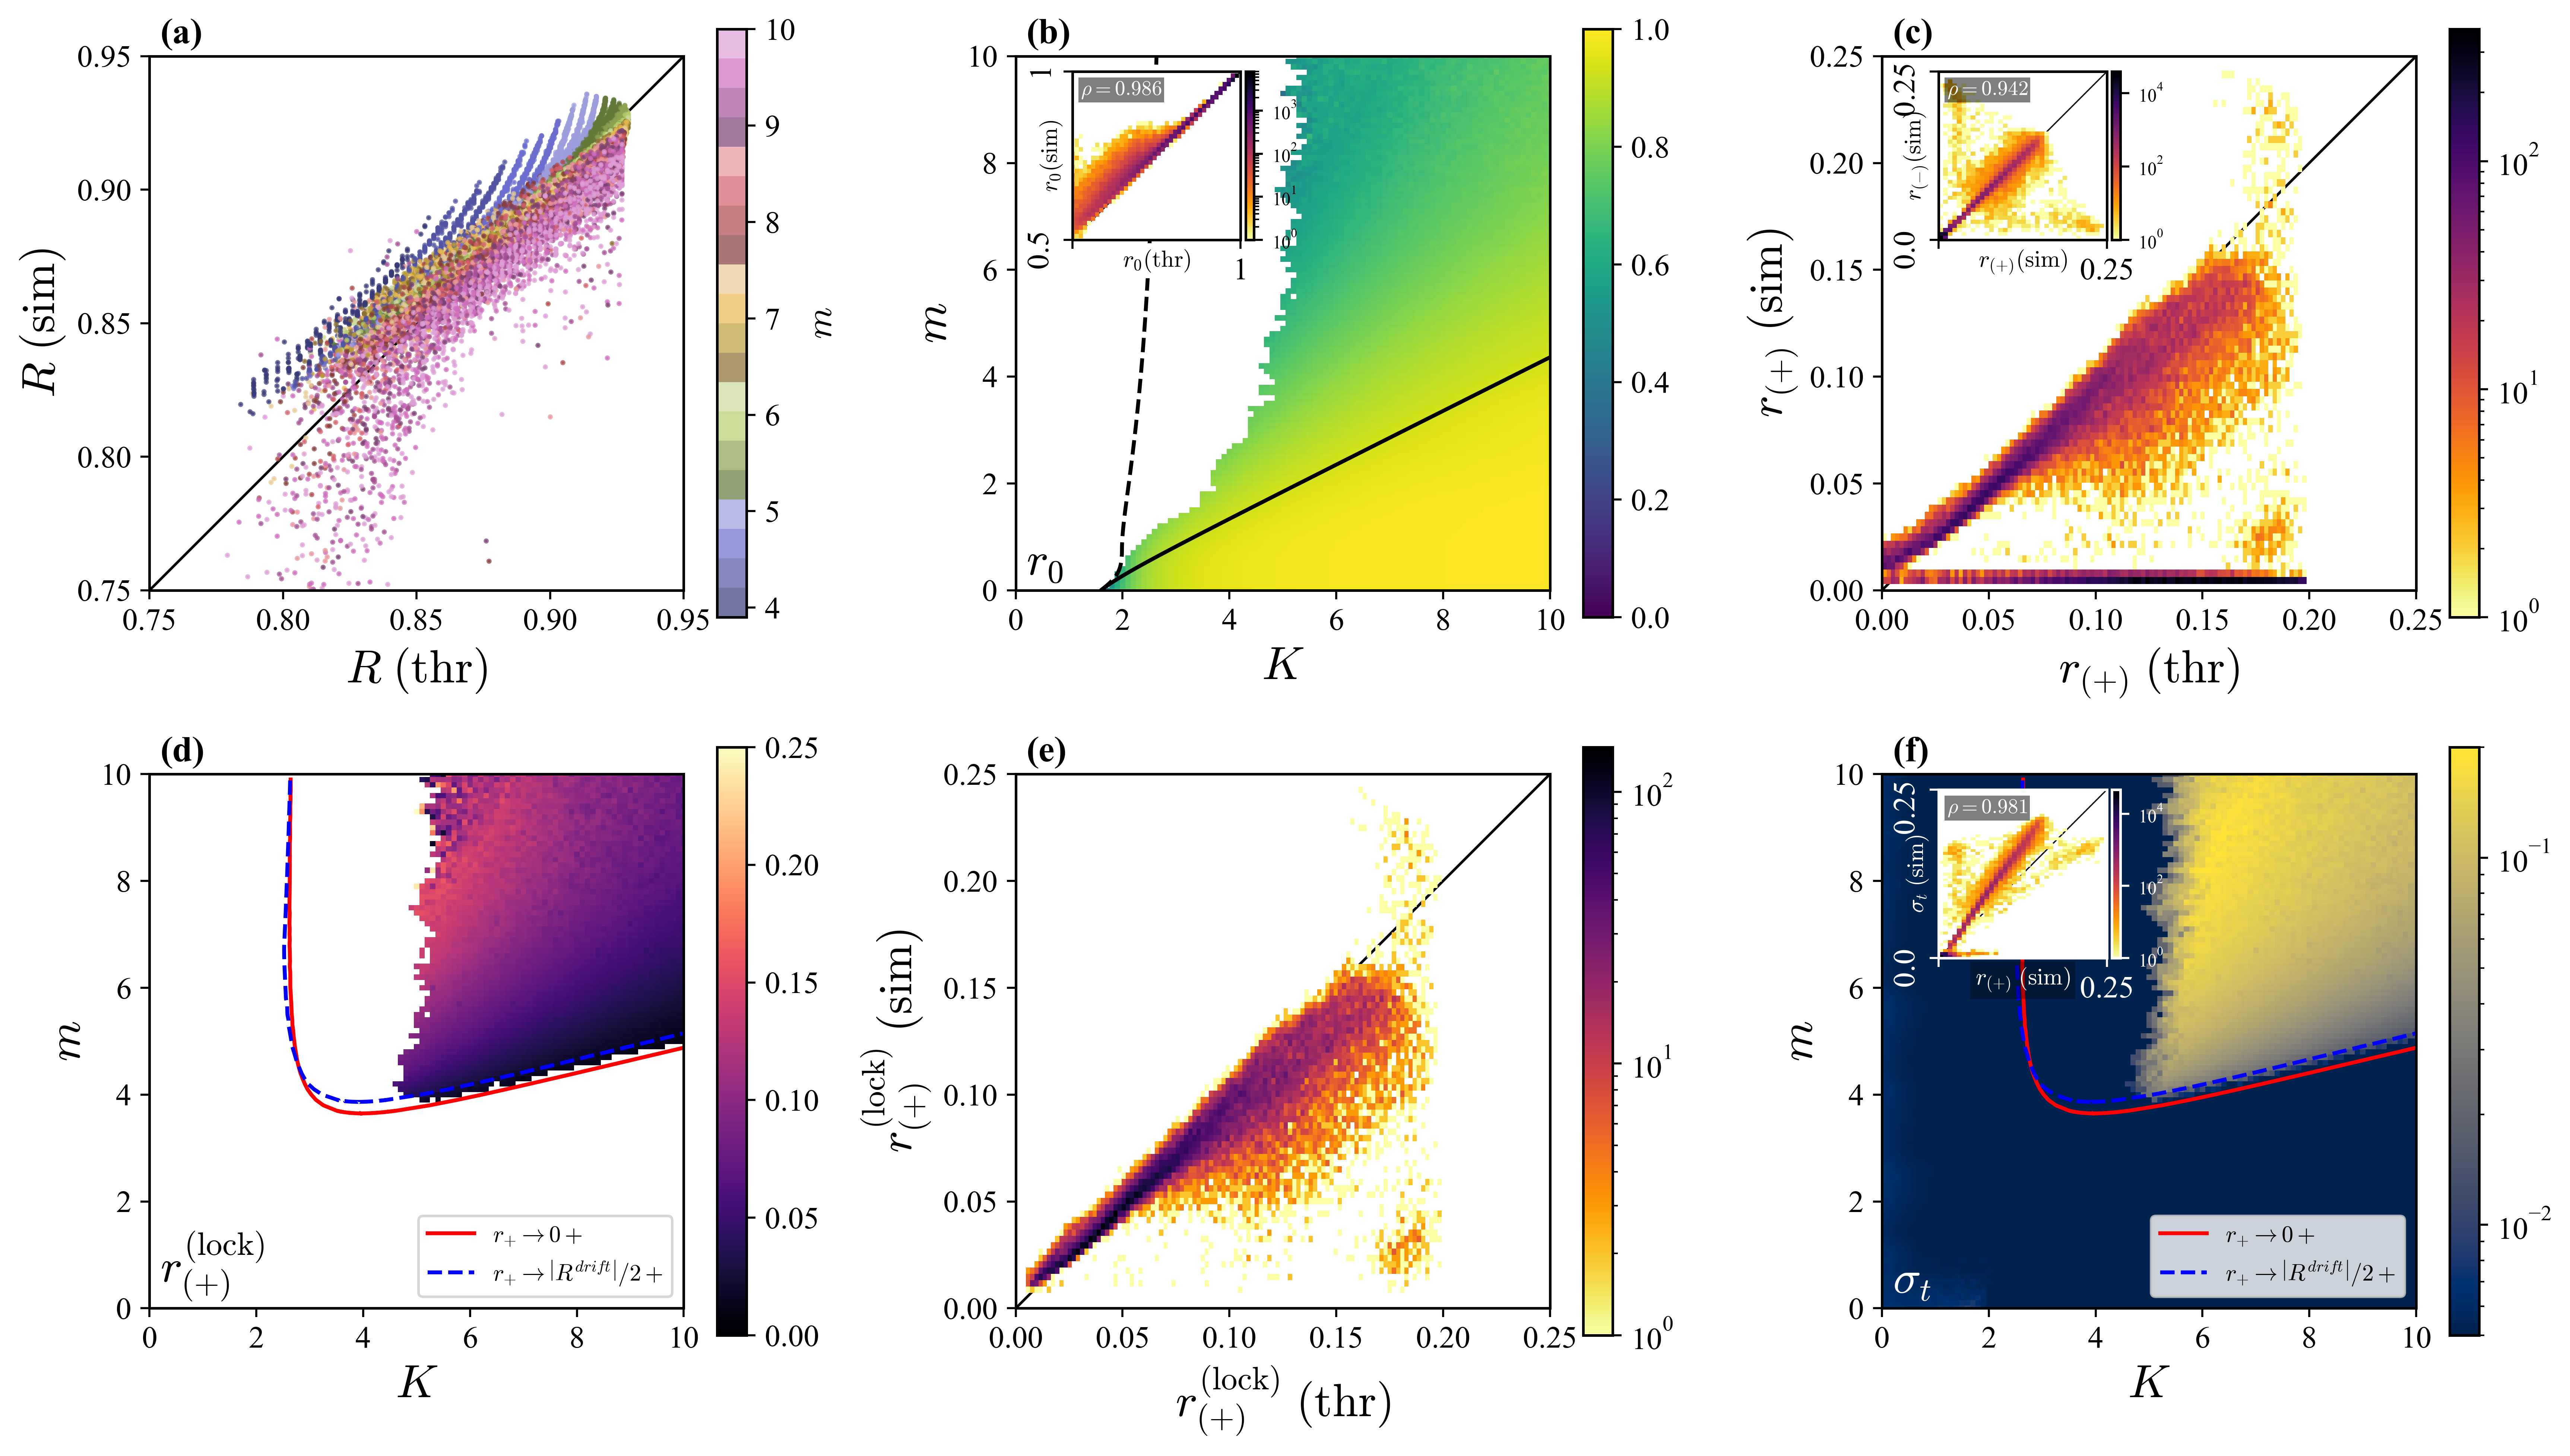

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.patches as mpatches

# ----------------------------
# 0) Figure & axes 준비
# ----------------------------
fig, axes = plt.subplots(2, 3, figsize=(14, 8), dpi=500)
# 패널 라벨 도우미
def panel_label(ax, letter, dx=0.02, dy=1.07,color='black',bbox=dict(facecolor='white', edgecolor='none', pad=0.0)):
    ax.text(dx, dy, f"({letter})", transform=ax.transAxes,
            ha="left", va="top", fontsize=14, fontweight="bold",color=color,bbox=bbox)

# ========== (a) ==========
ax = axes[0, 0]
panel_label(ax, "a")

Rsims = []
Rthrs = []
MMs = []
KKs = []
for i in range(10):
    Rsim = R0s_new[i,:,:] + RPs_new[i,:,:] + RMs_new[i,:,:]
    Rsim = np.where(Rsim > 0.1, Rsim, np.nan)
    Rsims.append(Rsim)
    Rthrs.append(Rthr)
    MMs.append(MM)
    KKs.append(KK)
Rthrs, Rsims, MMs, KKs = np.array(Rthrs), np.array(Rsims), np.array(MMs), np.array(KKs)

sc = ax.scatter(Rthrs.flatten(), Rsims.flatten(), s=1,
                c=MMs.flatten(), alpha=0.7, cmap='tab20b')
cb_a = fig.colorbar(sc, ax=ax, label=r'$m$')
l = (0.75, 0.95)
ax.set_xlim(0.75, 0.95)
ax.set_ylim(0.75, 0.95)
ax.plot(l, l, c='k', lw=1, zorder=-10)
ax.set_aspect('equal', adjustable='box')
xticks = ax.get_xticks()
ax.set_yticks(xticks)
ax.set_xlabel(r'$R$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$R$ $(\rm{sim})$', fontsize=18)

# ========== (b) ==========
ax = axes[0, 1]
panel_label(ax, "b")

pcm_b = ax.pcolormesh(KK, MM, np.nanmean(R0s_new, axis=0), vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm_b, ax=ax)

ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$r_0$", transform=ax.transAxes, fontsize=18,
        color="black", ha="left", va="bottom")
ax.set_aspect('equal', adjustable='box')
# inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.90),
                   bbox_transform=ax.transAxes)
valid_indices = ~np.isnan(R0_thrs) & ~np.isnan(R0_sims)
F_thrs = R0_thrs[valid_indices]; F_sims = R0_sims[valid_indices]
# panel_label(axins, "inset1",dy=1.22)
hist_b = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_b = nan_corrcoef(R0_thrs, R0_sims)
lims = (0.5, 1)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_0(\mathrm{thr})$', fontsize=9)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_0(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# inset cbar (살짝 띄워서)
cbax_b = inset_axes(axins, width="5%", height="100%", loc='right',
                    bbox_to_anchor=(0.08, 0, 1, 1),
                    bbox_transform=axins.transAxes, borderpad=0)
cb_b = plt.colorbar(hist_b[3], cax=cbax_b)
cb_b.ax.tick_params(labelsize=7)

axins.text(0.05, 0.95, fr"$\rho = {pcc_b:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.5, 1], [0.5, 1]); axins.set_xticks([0.5, 1], ["", 1])
axins.tick_params(axis='y', rotation=90)

# ========== (c) ==========
ax = axes[0, 2]
panel_label(ax, "c")

conds = np.isnan(RP_sims.flatten()) | np.isnan(RP_thrs.flatten())
hist_c = ax.hist2d(RP_thrs.flatten()[~conds], RP_sims.flatten()[~conds],
                   bins=100, cmap='inferno_r', norm=mcolors.LogNorm())
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 0.25); ax.set_ylim(0, 0.25)
ax.plot(ax.get_xlim(), ax.get_xlim(), c='k', lw=1, zorder=-10)
fig.colorbar(hist_c[3], ax=ax)
ax.set_xlabel(r'$r_{(+)}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}$ $(\rm{sim})$', fontsize=18)
ax.set_aspect('equal', adjustable='box')
# inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.90),
                   bbox_transform=ax.transAxes)
valid_indices = ~np.isnan(RP_sims) & ~np.isnan(RM_sims)
# panel_label(axins, "inset2",dy=1.22)

P_sims = RP_sims[valid_indices]; M_sims = RM_sims[valid_indices]
hist_ci = axins.hist2d(P_sims, M_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_c = nan_corrcoef(P_sims, M_sims)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}(\mathrm{sim})$', fontsize=9)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel(r'$r_{(-)}(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

cbax_ci = inset_axes(axins, width="5%", height="100%", loc='right',
                     bbox_to_anchor=(0.08, 0, 1, 1),
                     bbox_transform=axins.transAxes, borderpad=0)
cb_ci = plt.colorbar(hist_ci[3], cax=cbax_ci)
cb_ci.ax.tick_params(labelsize=7)
axins.text(0.05, 0.95, fr"$\rho = {pcc_c:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25]); axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

# ========== (d) ==========
ax = axes[1, 0]
panel_label(ax, "d")

pcm_d = ax.pcolormesh(KK, MM, np.nanmean(RPLs_new, axis=0), vmin=0, vmax=0.25, cmap='magma')
ax.plot(K_rp0d, ms_rp0, 'r-', label=r'$r_{+}\rightarrow 0+$')
ax.plot(K_rp0u, ms_rp0, 'r-')
ax.plot(K_rpdhd, ms_rpdh, 'b--', label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
ax.plot(K_rpdhu, ms_rpdh, 'b--')
ax.set_aspect('equal', adjustable='box')
fig.colorbar(pcm_d, ax=ax)
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$r_{(+)}^{(\rm{lock})}$", transform=ax.transAxes,
        fontsize=18, color="black", ha="left", va="bottom")
ax.legend(loc=4, fontsize=9)

# ========== (e) ==========
ax = axes[1, 1]
panel_label(ax, "e")
ax.set_aspect('equal', adjustable='box')

conds = np.isnan(RPL_sims.flatten()) | np.isnan(RPL_thrs.flatten())
hist_e = ax.hist2d(RPL_thrs.flatten()[~conds], RPL_sims.flatten()[~conds],
                   bins=100, cmap='inferno_r', norm=mcolors.LogNorm())
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(0, 0.25); ax.set_ylim(0, 0.25)
ax.plot(ax.get_xlim(), ax.get_xlim(), c='k', lw=1, zorder=-10)
fig.colorbar(hist_e[3], ax=ax)
ax.set_xlabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{thr})$', fontsize=18)
ax.set_ylabel(r'$r_{(+)}^{(\rm{lock})}$ $(\rm{sim})$', fontsize=18)

# ========== (f) ==========
ax = axes[1, 2]
panel_label(ax, "f")
ax.set_aspect('equal', adjustable='box')

pcm_f = ax.pcolormesh(KK, MM, np.nanmean(Rstds, axis=0),
                      cmap='cividis', norm=mcolors.LogNorm(vmin=5e-3, vmax=2e-1))
ax.plot(K_rp0d, ms_rp0, 'r-', label=r'$r_{+}\rightarrow 0+$')
ax.plot(K_rp0u, ms_rp0, 'r-')
ax.plot(K_rpdhd, ms_rpdh, 'b--', label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
ax.plot(K_rpdhu, ms_rpdh, 'b--')
fig.colorbar(pcm_f, ax=ax)
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18); ax.set_ylabel('$m$', fontsize=18)
ax.text(0.02, 0.01, r"$\sigma_t$", transform=ax.transAxes,
        fontsize=18, color="white", ha="left", va="bottom")
ax.legend(loc=4, fontsize=9)

# (f) inset
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.45, 0.1, 0.9, 0.90),
                   bbox_transform=ax.transAxes)
# A, B = RSTDS, Rstd_new
A,B =  RPs,Rstds
valid = ~np.isnan(A) & ~np.isnan(B)
F_thrs = A[valid]; F_sims = B[valid]
hist_f = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())
pcc_f = nan_corrcoef(A, B)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k', zorder=-10)
axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims); axins.set_ylim(*lims)
# xl = axins.set_xlabel(r'$r_0$ $(\mathrm{thr})$', fontsize=9)
# xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0, alpha=0.3))
# axins.set_ylabel(r'$r_0$ $(\mathrm{sim})$', fontsize=9)
xl = axins.set_xlabel(r'$r_{(+)}$ $(\mathrm{sim})$', fontsize=9)
xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0,alpha=0.3))
axins.set_ylabel(r'$\sigma_t$ $(\mathrm{sim})$', fontsize=9)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# inset 글자/테두리 흰색
axins.tick_params(axis='both', colors='white')
axins.xaxis.label.set_color('white')
axins.yaxis.label.set_color('white')
for sp in axins.spines.values():
    sp.set_edgecolor('white')
# panel_label(axins, "inset3",dy=1.22,color='white',bbox=dict(facecolor='black',alpha=0.3, edgecolor='none', pad=0.0))

# inset colorbar (흰색 tick 모두)
cbax_f = inset_axes(axins, width="5%", height="100%", loc='right',
                    bbox_to_anchor=(0.08, 0, 1, 1),
                    bbox_transform=axins.transAxes, borderpad=0)
cb_f = plt.colorbar(hist_f[3], cax=cbax_f)
cb_f.ax.tick_params(labelsize=7)
cb_f.ax.yaxis.set_tick_params(color='white', which='both')
plt.setp(cb_f.ax.get_yticklabels(minor=False), color='white')
plt.setp(cb_f.ax.get_yticklabels(minor=True), color='white')
cb_f.outline.set_edgecolor('white')

axins.text(0.05, 0.95, fr"$\rho = {pcc_f:.3f}$", transform=axins.transAxes,
           fontsize=8, color="white", ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25]); axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

# ----------------------------
# 마무리
# ----------------------------
plt.tight_layout()
plt.savefig('fig3.pdf', dpi=300)
# plt.show()


# Draw Fig 4

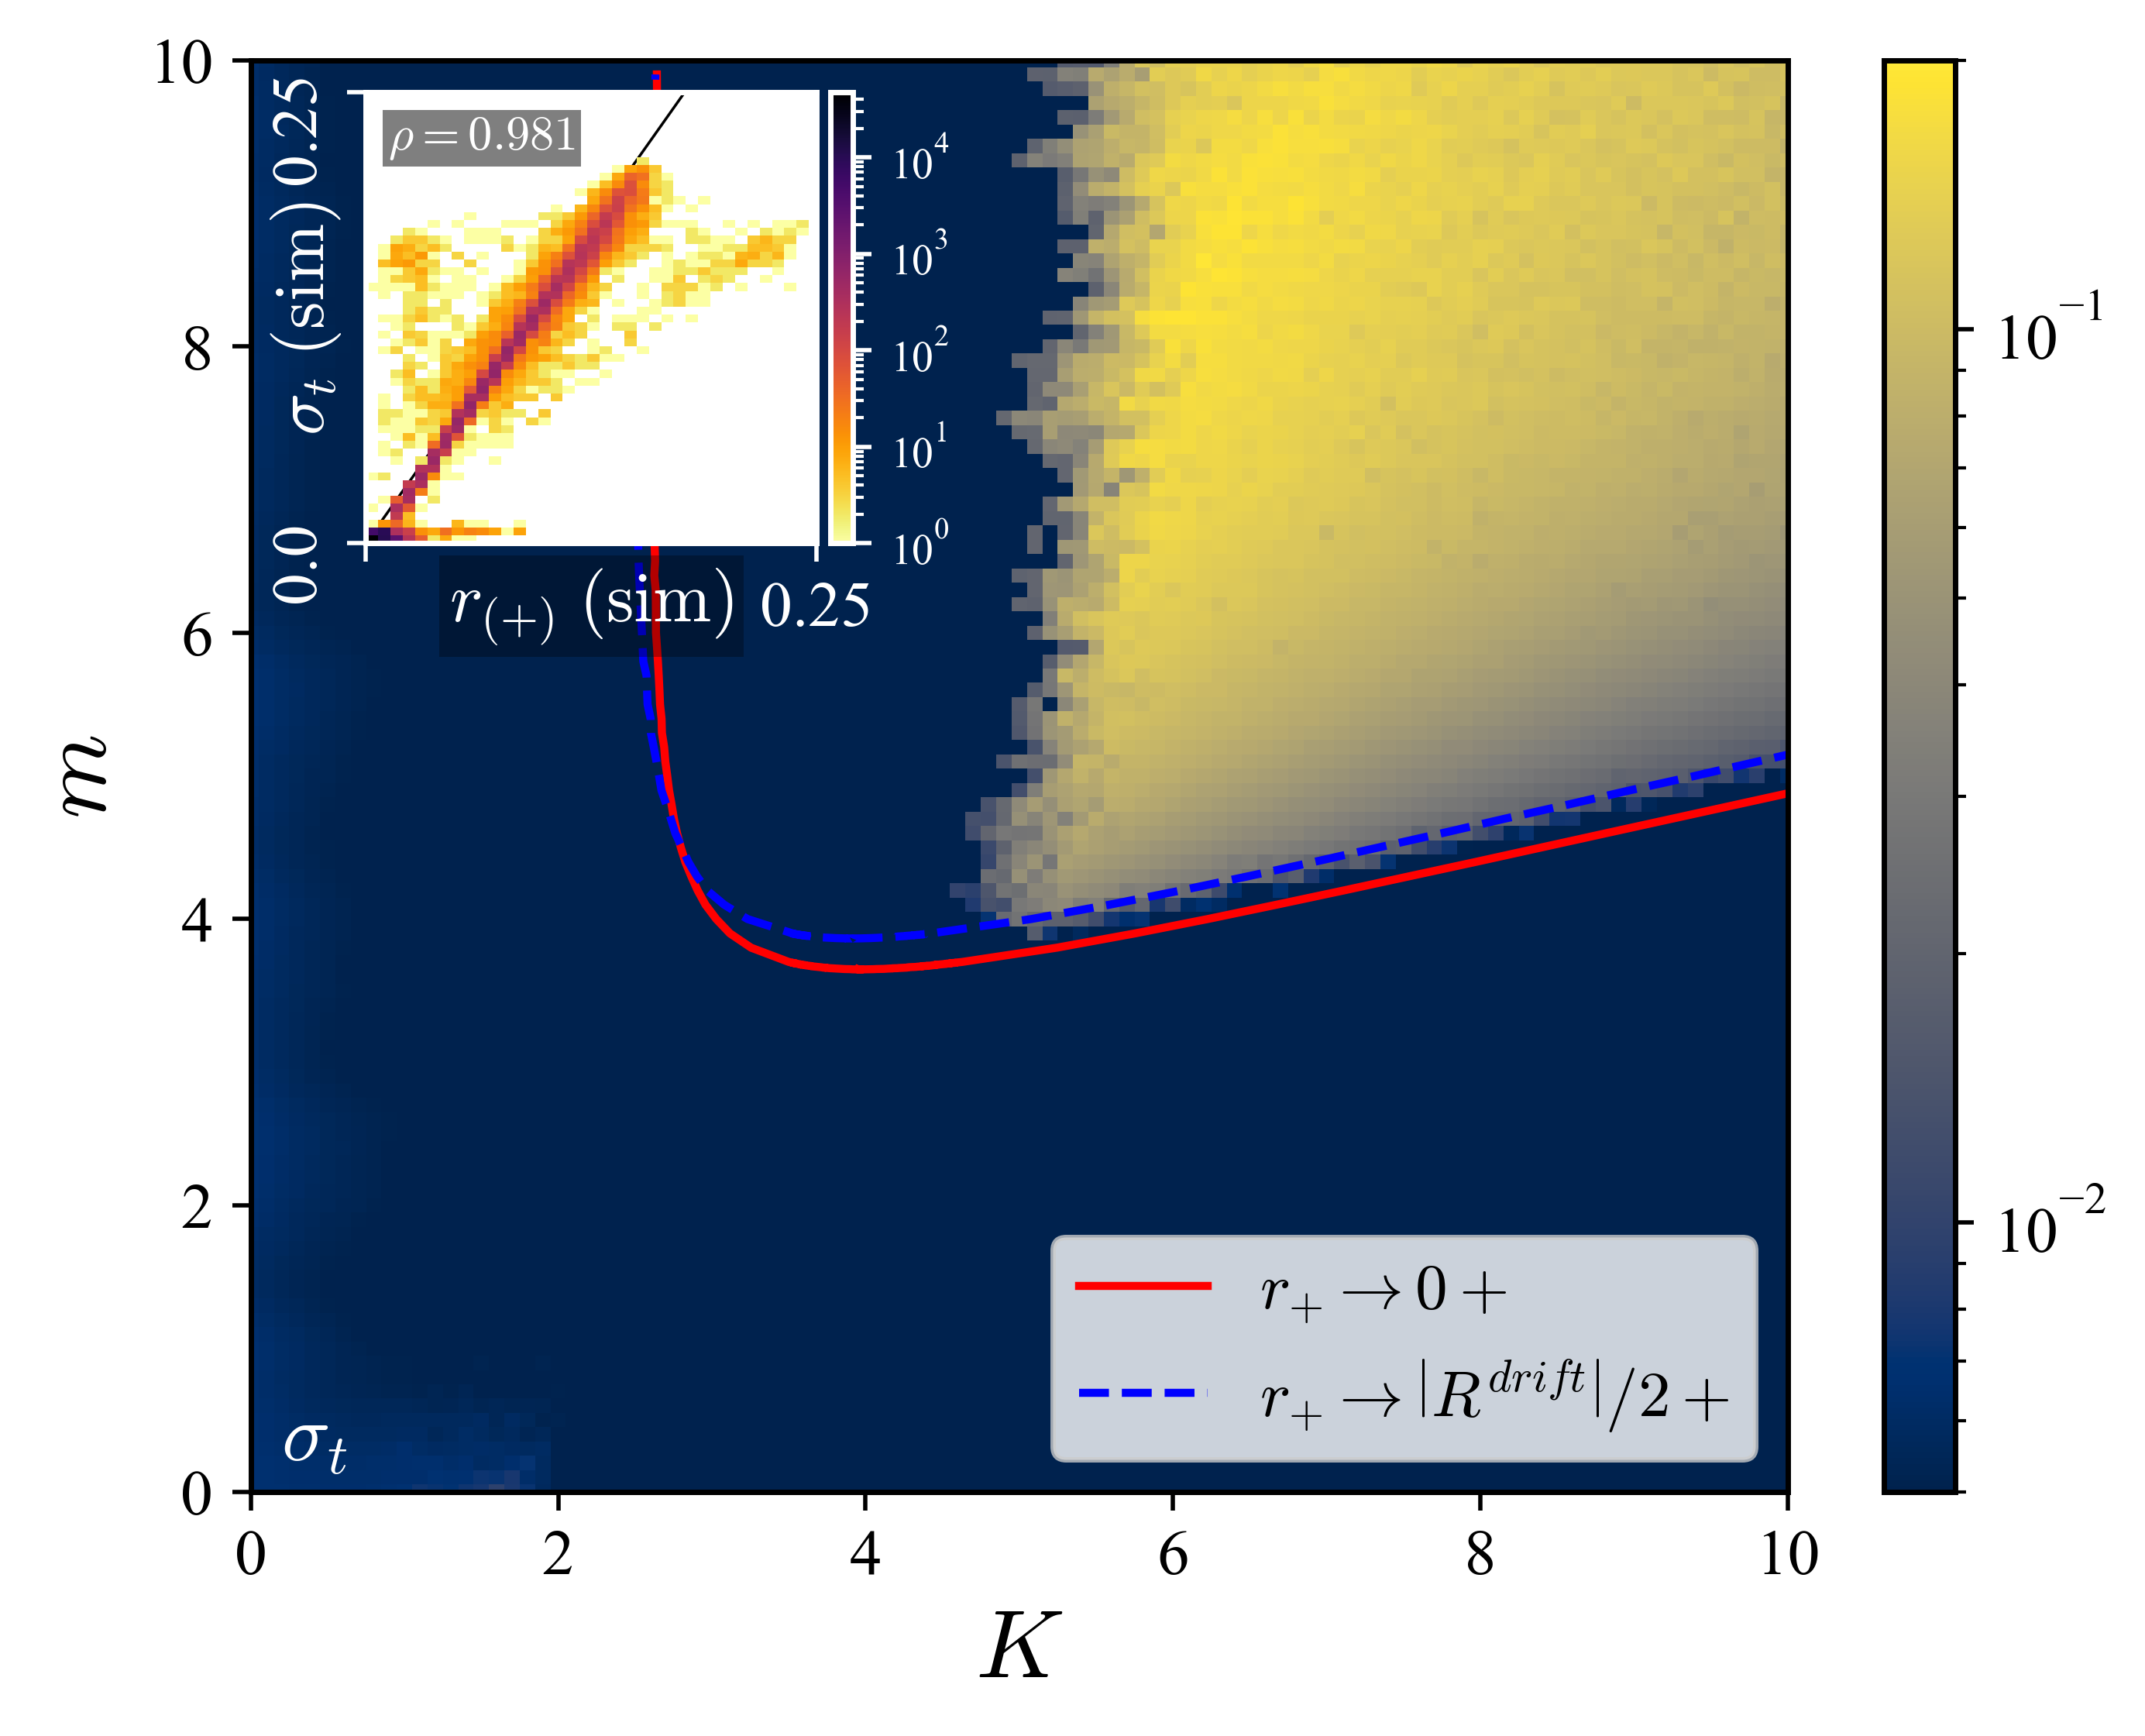

In [31]:
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
# pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstd_new, axis=0), vmin=0, vmax=0.25,cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
pcm = ax.pcolormesh(KK, MM, np.nanmean(Rstds, axis=0), cmap='cividis',norm=mcolors.LogNorm(vmin=5e-3,vmax=2e-1))
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}\rightarrow 0+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}\rightarrow \left|R^{drift}\right|/2 +$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=18)
ax.set_ylabel('$m$', fontsize=18)

ax.text(
    0.02, 0.01,                    # (x, y) 위치: 오른쪽 위
    r"$\sigma_t$",  # 표시할 내용 (LaTeX 가능)
    transform=ax.transAxes,        # 좌표계: 축 전체(0~1)
    fontsize=15,
    color="white",
    ha="left", va="bottom",          # 정렬: 오른쪽 위 기준
)
plt.legend(loc=4)


# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%",
                   bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),
                   bbox_transform=ax.transAxes)

A,B =  RPs,Rstds
valid_indices = ~np.isnan(A) & ~np.isnan(B)
F_thrs = A[valid_indices]
F_sims = B[valid_indices]

hist = axins.hist2d(F_thrs, F_sims, bins=50, cmap='inferno_r', norm=mcolors.LogNorm())

pcc = nan_corrcoef(A, B)
lims = (0.0, 0.25)
axins.plot([lims[0], lims[1]], [lims[0], np.sqrt(2)*lims[1]], lw=0.5, c='k', zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl = axins.set_xlabel(r'$r_{(+)}$ $(\mathrm{sim})$', fontsize=13)
xl.set_bbox(dict(facecolor='black', edgecolor='none', pad=2.0,alpha=0.3))
axins.set_ylabel(r'$\sigma_t$ $(\mathrm{sim})$', fontsize=13)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)


axins.tick_params(axis='both', colors='white')     # x, y tick 글자 흰색
axins.xaxis.label.set_color('white')               # x축 라벨 흰색
axins.yaxis.label.set_color('white')               # y축 라벨 흰색
for spine in axins.spines.values():                # 축 테두리 선 색상
    spine.set_edgecolor('white')

# colorbar 글씨도 흰색으로
cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
cb.outline.set_edgecolor('white')


# ✅ inset 옆에 colorbar 추가
cbax = inset_axes(
    axins,
    width="5%", height="100%", loc='right',
    bbox_to_anchor=(0.08, 0, 1, 1),   # ← 여기 첫 번째 값(0.05→0.10)으로 여백 조절
    bbox_transform=axins.transAxes,
    borderpad=0
)
cb = plt.colorbar(hist[3], cax=cbax)
cb.ax.tick_params(labelsize=8)
cb.ax.yaxis.set_tick_params(color='white', which='both')  # 눈금선 색상
plt.setp(cb.ax.get_yticklabels(minor=False), color='white')  # 큰 tick 라벨
plt.setp(cb.ax.get_yticklabels(minor=True), color='white')   # 작은 tick 라벨
cb.outline.set_edgecolor('white')

# 텍스트
axins.text(0.05, 0.95, fr"$\rho = {pcc:.3f}$",
           transform=axins.transAxes, fontsize=9, color="white",
           ha="left", va="top",
           bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0))

axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.0, 0.25], [0.0, 0.25])
axins.set_xticks([0.0, 0.25], ["", 0.25])
axins.tick_params(axis='y', rotation=90)

plt.show()


In [60]:
from scipy.optimize import curve_fit

def power_law_fit(x, y):
    def func(x, a, b):
        return a * x ** b
    popt, _ = curve_fit(func, x, y)
    a, b = popt
    return a, b
# Note: The error "Result from function call is not a proper array of floats" occurs when the inputs to curve_fit
# contain NaN, infinite values, or are of mismatched shapes. Add preprocessing to clean input data.

def safe_power_law_fit(x, y):
    """
    Fit y = a * x^b to arrays x and y, skipping NaN/inf and keeping only positive x.
    Returns a, b from the fit.
    """
    # Convert to arrays, flatten
    x = np.asarray(x).flatten()
    y = np.asarray(y).flatten()
    
    # Build mask: remove nan, inf, x<=0 or y<=0 (power law undefined for negative/zero x)
    mask = (~np.isnan(x)) & (~np.isnan(y)) & (~np.isinf(x)) & (~np.isinf(y)) & (x > 0) & (y > 0)
    x_clean = x[mask]
    y_clean = y[mask]
    
    if len(x_clean) < 2:
        raise ValueError("Not enough valid data points to fit.")
        
    def func(x, a, b):
        return a * x**b
    
    popt, _ = curve_fit(func, x_clean, y_clean)
    a, b = popt
    return a, b

# Replace calls to power_law_fit with safe_power_law_fit to avoid fitting errors.


In [61]:
a,b= safe_power_law_fit(RPs,Rstds)

In [64]:
a**2 , b*2

(2.0933154673722707, 2.1012312905169863)

$$
\begin{align}
    \sigma_t^2 &= \left\langle \left( R(t)- \langle R\rangle_t \right)^2 \right\rangle_t \\
    &= 4 r_p^2\left(\langle \cos^2 \phi_p \rangle +\langle \cos \phi_p\rangle^2 \right) \\
    &\approx 4r_p^2 \left[\frac{1}{2}-\frac{1}{4}\frac{m K r_0}{4m^2 \Omega_p^2 +1}-\left(\frac{1}{2}\frac{m K r_0}{m^2 \Omega_p ^2 +1}\right)^2\right]
\end{align}
$$

\begin{equation}
\begin{aligned}
    \sigma_t^2 &= \left\langle \left( R(t)- \langle R\rangle_t \right)^2 \right\rangle_t \\
    &= 4 r_p^2\left(\langle \cos^2 \phi_p \rangle +\langle \cos \phi_p\rangle^2 \right) \\
    &\approx 4r_p^2 \left[\frac{1}{2}-\frac{1}{4}\frac{m K r_0}{4m^2 \Omega_p^2 +1}-\left(\frac{1}{2}\frac{m K r_0}{m^2 \Omega_p ^2 +1}\right)^2\right]
\end{aligned}
\end{equation}

$\Omega_p$

In [35]:
import sympy as sym

In [ ]:
K,R,R0,rp,m = sym.symbols('K R R_0 r_+ m',real=True, positive = True)
a = 1/sym.sqrt(K*R*m)
b = 4/sym.pi * a - 0.3056*a**3

b = np.where(np.where(a>1.193,1,b)>=1,1,b)

omega_p = b*K*R


In [68]:
omega_p

K*R*(4/(pi*sqrt(K)*sqrt(R)*sqrt(m)) - 0.3056/(K**(3/2)*R**(3/2)*m**(3/2)))

In [ ]:
omega_2 = 4*rp**2 * (sym.Rational(1,2)-sym.Rational(1,4)*m*K*R/(4*m**2*omega_p**2 +1) - (sym.Rational(1,2)*m*K*R/(m**2*omega_p**2+1))**2)

In [52]:
sym.simplify(omega_2)

r_+**2*(-pi**4 - 4*pi**2 + 512)/256